# Data Collection

In [1]:
import pandas as pd
import numpy as np
#turning the CSV dataset into a dataframe
df = pd.read_csv('USD_RUB Historical Data (2).csv')
usddata = df
usddata.columns = ['date','USD_Price','USD_Open','USD_High','USD_Low','Change %']
usddata.describe()

,USD_Price,USD_Open,USD_High,USD_Low
count,4774.000000,4774.000000,4774.000000,4774.000000
mean,44.313425,44.296398,44.579770,44.034909
std,19.020701,18.991476,19.290728,18.751049
min,23.156000,23.157000,23.203000,23.052000
25%,28.670000,28.667250,28.720500,28.614550
50%,32.374500,32.347500,32.442500,32.128000
75%,63.713600,63.708625,63.982650,63.379850
max,143.000000,129.000000,158.300000,125.500000


In [2]:
#turning the CSV dataset into a dataframe
##renaming the columns since previously long column name caused errors
header_list = ["Day", "OilPrice"]
df1 = pd.read_csv('Cushing_OK_WTI_Spot_Price_FOB (2).csv',skiprows=5,names =header_list )
#indeces should be reversed 
df1 = df1[::-1] 
WTIdata = df1
WTIdata.describe()
# print("df1min is:",df1.min())
WTIdata

,Day,OilPrice
9169,01/2/1986,25.56
9168,01/3/1986,26.00
9167,01/6/1986,26.53
9166,01/7/1986,25.85
9165,01/8/1986,25.87
...,...,...
4,05/17/2022,112.31
3,05/18/2022,109.67
2,05/19/2022,112.21
1,05/20/2022,112.63


In [3]:
df = pd.read_csv('EUR_RUB Historical Data.csv')
eurdata = df
eurdata.columns = ['date','EUR_Price','EUR_Open','EUR_High','EUR_Low','Change %']
eurdata.describe()

,EUR_Price,EUR_Open,EUR_High,EUR_Low
count,4796.000000,4796.000000,4796.000000,4796.000000
mean,53.879060,53.836743,54.204712,53.549477
std,19.171629,19.221707,19.458707,18.934326
min,33.267000,33.240000,33.464000,33.212000
25%,36.869500,36.855750,36.980500,36.715000
50%,43.783500,43.751500,43.967500,43.586500
75%,71.391500,71.357750,71.767500,70.998000
max,127.000000,144.791000,144.791000,121.655000


In [4]:
# # Import libraries
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# # Create an URL object
# url = 'https://www.cbr.ru/eng/hd_base/overnight/?UniDbQuery.Posted=True&UniDbQuery.From=18.06.1998&UniDbQuery.To=04.05.2022'
# # Create object page
# page = requests.get(url)

# # parser-lxml = Change html to Python friendly format
# # Obtain page's information
# soup = BeautifulSoup(page.text, 'lxml')
# soup

# # Obtain information from tag <table>
# table1 = soup.find(class_ ="data")
# table1

# # Obtain every title of columns with tag <th>
# headers = []
# for i in table1.find_all('th'):
#  title = i.text
#  headers.append(title)
    
# # Create a dataframe
# mydata = pd.DataFrame(columns = headers)

# # Create a for loop to fill mydata
# for j in table1.find_all('tr')[1:]:
#  row_data = j.find_all('td')
#  row = [i.text for i in row_data]
#  length = len(mydata)
#  mydata.loc[length] = row

# #save into a csv file
# mydata.to_csv('Interest_rate.csv')
# df = pd.read_csv('Interest_rate.csv',index_col=0)
# overnightint = df
# overnightint.columns = ['date','Overnight_int_rate']
# overnightint.describe()

In [5]:
df = pd.read_csv('Interest_rate.csv',index_col=0)
overnightint = df
overnightint.columns = ['date','Overnight_int_rate']
overnightint.describe()

,Overnight_int_rate
count,111.000000
mean,30.734234
std,39.732033
min,5.250000
25%,8.500000
50%,11.500000
75%,40.000000
max,250.000000


# Data Cleaning

In [6]:
#mismatch of numbers indicate skipped dates in the WTI dataset
#this should be considered during the merge of the two datasets
#Date formats in two datasets are different and should be uniformized
from dateutil.parser import parse
def calend(string):
    return parse(string)

WTIdata['Calendar_date'] = WTIdata['Day'].apply(calend)
WTIdata = WTIdata.drop(['Day'],axis=1)

usddata['Calendar_date'] = usddata['date'].apply(calend)
usddata = usddata.drop(['date'],axis=1)

eurdata['Calendar_date'] = eurdata['date'].apply(calend)
eurdata = eurdata.drop(['date'],axis=1)


In [7]:
#creating a dataframe with dates in the selected time period that contains only business days 
date = pd.DataFrame()
date['Calendar_date'] = pd.date_range(start='12/1/2003', end='5/23/2022',freq='B')
date

,Calendar_date
0,2003-12-01
1,2003-12-02
2,2003-12-03
3,2003-12-04
4,2003-12-05
...,...
4816,2022-05-17
4817,2022-05-18
4818,2022-05-19
4819,2022-05-20


In [8]:
#merging businessday data frame with ruble data frame
all_curr_wti =  pd.merge(date,usddata, on="Calendar_date",how='left')
all_curr_wti =  pd.merge(all_curr_wti,eurdata, on="Calendar_date",how='left')
all_curr_wti = pd.merge(all_curr_wti,WTIdata, on="Calendar_date",how='left')

In [9]:
#checking any missing values (null or NaN)
is_NaN = all_curr_wti[all_curr_wti.isnull().any(axis=1)]
is_NaN

,Calendar_date,USD_Price,USD_Open,USD_High,USD_Low,Change %_x,EUR_Price,EUR_Open,EUR_High,EUR_Low,Change %_y,OilPrice
18,2003-12-25,29.2420,29.2380,29.2500,29.1840,-0.00%,36.406,36.392,36.449,36.326,-0.03%,NaN
19,2003-12-26,29.3560,29.2300,29.3760,29.2250,0.39%,36.488,36.397,36.605,36.359,0.23%,NaN
23,2004-01-01,NaN,NaN,NaN,NaN,NaN,36.655,36.806,36.845,36.453,-0.41%,NaN
24,2004-01-02,29.2400,29.2300,29.2400,29.2300,-0.01%,36.797,36.657,36.937,36.599,0.39%,NaN
35,2004-01-19,28.7910,28.7820,28.8100,28.7700,0.01%,35.574,35.576,35.772,35.496,-0.24%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4730,2022-01-17,76.1055,76.2202,76.7754,75.6964,-0.15%,86.835,87.005,87.758,86.257,-0.20%,NaN
4755,2022-02-21,80.0170,77.9465,80.3438,76.1358,3.47%,90.230,87.544,90.723,86.607,3.07%,NaN
4794,2022-04-15,79.9950,80.8975,80.8991,79.2471,-1.12%,87.283,89.417,90.268,86.862,-2.39%,NaN
4805,2022-05-02,NaN,NaN,NaN,NaN,NaN,74.197,77.282,77.407,73.513,-4.06%,105.18


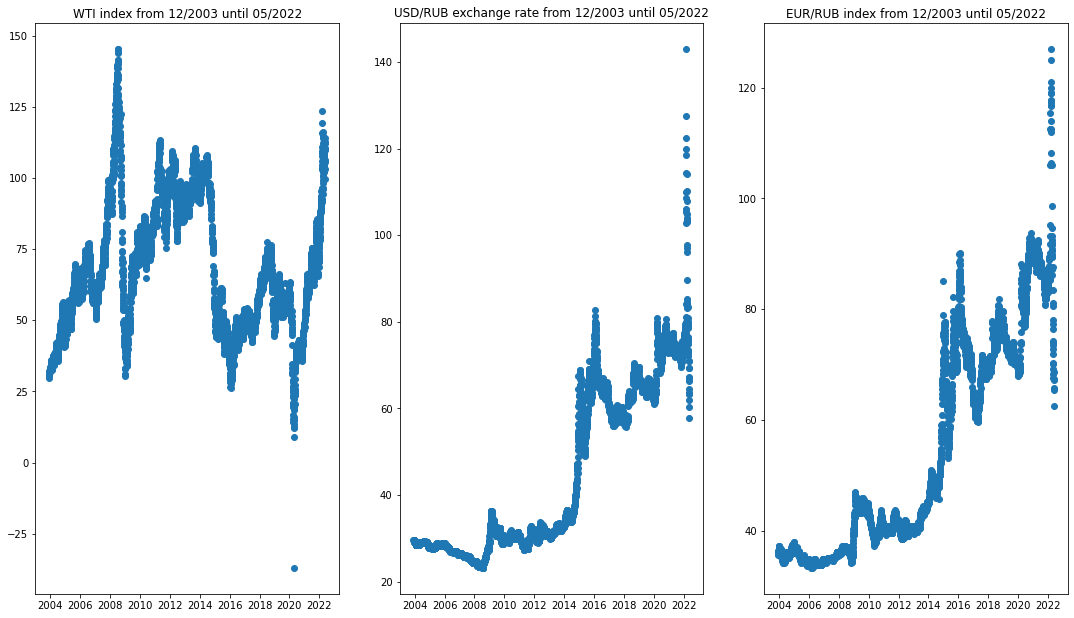

In [10]:
#scatter plot of each feature (variables in the dataframe will help understanding general patterns and outliers)
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

ax1 = fig.add_subplot(131) 
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title('WTI index from 12/2003 until 05/2022')
ax2.set_title('USD/RUB exchange rate from 12/2003 until 05/2022')
ax3.set_title('EUR/RUB index from 12/2003 until 05/2022')

ax1.scatter(all_curr_wti['Calendar_date'],all_curr_wti['OilPrice'])
ax2.scatter(all_curr_wti['Calendar_date'],all_curr_wti['USD_Price'])
ax3.scatter(all_curr_wti['Calendar_date'],all_curr_wti['EUR_Price'])
plt.show()

In [11]:
#an outlier on 2016 with a value close to 0 is identified from the scatterplot
#the day of the outlier values was found 
min_value = all_curr_wti['OilPrice'].min()
print (all_curr_wti['OilPrice'].iloc[all_curr_wti.index[all_curr_wti.OilPrice == min_value]])

4275   -36.98
Name: OilPrice, dtype: float64


In [12]:
all_curr_wti['Change %_x'] = all_curr_wti['Change %_x'].str.replace('%','').astype(float)
all_curr_wti['Change %_y'] = all_curr_wti['Change %_y'].str.replace('%','').astype(float)

In [13]:
#there are 313 missing data points in the data frame
#NaN datapoints are replaced by interpolating the average of the closes three datapoints
a = all_curr_wti.rolling(3).mean()
b = all_curr_wti.iloc[::-1].rolling(3).mean()
c = a.fillna(b).fillna(all_curr_wti).interpolate(method='nearest').ffill().bfill()
all_curr_wti = all_curr_wti.fillna(c)
all_curr_wti

,Calendar_date,USD_Price,USD_Open,USD_High,USD_Low,Change %_x,EUR_Price,EUR_Open,EUR_High,EUR_Low,Change %_y,OilPrice
0,2003-12-01,29.7020,29.7350,29.7410,29.6900,-0.13,35.530,35.604,35.810,35.439,-0.38,29.89
1,2003-12-02,29.7000,29.6960,29.7100,29.6900,-0.01,35.884,35.553,35.919,35.456,1.00,30.74
2,2003-12-03,29.6950,29.6930,29.7000,29.6890,-0.02,35.944,35.866,36.024,35.810,0.17,30.61
3,2003-12-04,29.6920,29.6910,29.7010,29.6850,-0.01,35.883,35.946,36.100,35.702,-0.17,31.24
4,2003-12-05,29.6310,29.6830,29.6910,29.6230,-0.21,36.046,35.865,36.090,35.734,0.45,30.68
...,...,...,...,...,...,...,...,...,...,...,...,...
4816,2022-05-17,63.6000,63.4000,63.9696,63.1746,0.32,68.569,67.469,69.598,65.985,1.64,112.31
4817,2022-05-18,63.4450,63.6000,64.0300,63.0010,-0.24,67.289,68.566,69.359,65.413,-1.87,109.67
4818,2022-05-19,61.9050,63.4450,63.6000,61.5747,-2.43,65.728,67.286,68.310,64.907,-2.32,112.21
4819,2022-05-20,60.2325,61.9050,61.9050,57.1250,-2.70,65.485,65.728,67.441,61.256,-0.37,112.63


In [14]:
#double checking whether the NaN values have been replaced 
is_NaN = all_curr_wti[all_curr_wti.isnull().any(axis=1)]
is_NaN

,Calendar_date,USD_Price,USD_Open,USD_High,USD_Low,Change %_x,EUR_Price,EUR_Open,EUR_High,EUR_Low,Change %_y,OilPrice


In [15]:
import pandas as pd
#turning the CSV dataset into a dataframe
df = pd.read_csv('russia.inflation.monthly (statbureau.org).csv')
Inflate = df
#Dropping the total column
Inflate = Inflate.iloc[:, :-1]


#Using melt function to stack up the columns and rows 
infaltion_rate = pd.melt(Inflate, id_vars=['Year'], var_name=['Month'])
#Tranversing the data month in words to date-time
infaltion_rate['Date'] = pd.to_datetime(infaltion_rate['Year'].astype(str) + '-' + infaltion_rate['Month'].astype(str)).dt.strftime('%Y-%m')
#Dropping the exessive columns and reset the index
infaltion_rate = infaltion_rate.sort_values(by=['Date']).drop(columns=['Month', 'Year']).reset_index(drop=['index'])
#Reindexing in wanted format 
infaltion_rate = infaltion_rate.reindex(['Date','value'], axis=1)
#Dropping the last 8 NaN values 
infaltion_rate = infaltion_rate.iloc[:-7, :]


In [16]:
print(infaltion_rate.loc[infaltion_rate['Date'] == '2003-12'])

        Date  value
155  2003-12    1.1


In [17]:
#select only data from 12-2003
infaltion_rate = infaltion_rate[155:]
#rename date column to Calendar_date
#infaltion_rate.columns = ['Calendar_date','inflation_rate']

In [18]:
#data frame should be reversed so that index 0 corresponds to the earliest date
overnightint = overnightint[::-1]

#date format should be changed 
from dateutil.parser import parse
def calend(string):
    return parse(string)

overnightint['Calendar_date'] = overnightint['date'].apply(calend)
overnightint = overnightint.drop(['date'],axis=1)
date = pd.DataFrame()
date['Calendar_date'] = pd.date_range(start='6/18/1998', end='5/23/2022',freq='B')
overnight_rate = pd.merge(date,overnightint,on = 'Calendar_date', how = 'left' )
overnight_rate= overnight_rate.fillna(method='ffill')
overnight_rate

,Calendar_date,Overnight_int_rate
0,1998-06-18,78.0
1,1998-06-19,60.0
2,1998-06-22,60.0
3,1998-06-23,60.0
4,1998-06-24,60.0
...,...,...
6238,2022-05-17,15.0
6239,2022-05-18,15.0
6240,2022-05-19,15.0
6241,2022-05-20,15.0


In [19]:
print(overnight_rate.loc[overnight_rate['Calendar_date'] == '2003-12-1'])
print(overnight_rate.loc[overnight_rate['Calendar_date'] == '2022-5-23'])

     Calendar_date  Overnight_int_rate
1422    2003-12-01                20.0
     Calendar_date  Overnight_int_rate
6242    2022-05-23                15.0


In [20]:
overnight_rate = overnight_rate[1422:6243]
overnight_rate['MonthYear'] = overnight_rate['Calendar_date'].dt.to_period('M')
#creating a separate data frame with monthly values 
overnight_rate = overnight_rate.groupby(overnight_rate['MonthYear']).mean().reset_index()
overnight_rate.columns = ['Calendar_date','Overnight_int_rate']

/var/folders/hh/b9jhpyvd09x3thlbfkdlhz1c0000gn/T/ipykernel_1961/731212201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overnight_rate['MonthYear'] = overnight_rate['Calendar_date'].dt.to_period('M')


In [21]:
#creating a column with only year and month values 
all_curr_wti['MonthYear'] = all_curr_wti['Calendar_date'].dt.to_period('M')
#creating a separate data frame with monthly values 
all_curr_wti = all_curr_wti.groupby(all_curr_wti['MonthYear']).mean().reset_index()
all_curr_wti

,MonthYear,USD_Price,USD_Open,USD_High,USD_Low,Change %_x,EUR_Price,EUR_Open,EUR_High,EUR_Low,Change %_y,OilPrice
0,2003-12,29.413304,29.428435,29.451174,29.381913,-0.073913,36.210087,36.133957,36.326087,35.993348,0.138261,32.157826
1,2004-01,28.844485,28.873500,28.895258,28.819167,-0.116364,36.344273,36.386409,36.605682,36.130045,-0.150455,34.210758
2,2004-02,28.506100,28.500100,28.544400,28.473200,-0.001500,36.018200,35.990750,36.256350,35.789250,0.010500,34.658333
3,2004-03,28.532304,28.530609,28.556174,28.505739,-0.000870,34.994696,35.007391,35.230739,34.767000,-0.060870,36.741304
4,2004-04,28.718864,28.693727,28.744727,28.672182,0.079091,34.456409,34.453045,34.634636,34.232364,-0.044091,36.723636
...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022-01,76.617710,76.487933,77.184152,75.935757,0.175714,86.711238,86.594429,87.404667,85.948476,0.142381,83.200317
218,2022-02,79.942150,78.708405,81.262335,77.132105,1.726000,88.795900,87.858600,90.404350,87.041700,1.044500,91.673500
219,2022-03,106.447391,105.951957,111.294535,101.504461,-0.884348,113.299435,115.651522,120.643522,108.037174,-0.589130,108.502609
220,2022-04,77.603810,78.186667,78.893571,76.419238,-0.735238,86.671095,87.614952,89.549238,83.795476,-0.715238,101.877302


In [22]:
all_curr_wti.columns = ['Calendar_date','USD_Price','USD_Open','USD_High','USD_Low','Change %_x','EUR_Price','EUR_Open','EUR_High','EUR_Low','Change %_y','OilPrice'] 
all_curr_wti =  pd.merge(all_curr_wti,overnight_rate, on="Calendar_date",how='left')
all_curr_wti

,Calendar_date,USD_Price,USD_Open,USD_High,USD_Low,Change %_x,EUR_Price,EUR_Open,EUR_High,EUR_Low,Change %_y,OilPrice,Overnight_int_rate
0,2003-12,29.413304,29.428435,29.451174,29.381913,-0.073913,36.210087,36.133957,36.326087,35.993348,0.138261,32.157826,20.000000
1,2004-01,28.844485,28.873500,28.895258,28.819167,-0.116364,36.344273,36.386409,36.605682,36.130045,-0.150455,34.210758,16.727273
2,2004-02,28.506100,28.500100,28.544400,28.473200,-0.001500,36.018200,35.990750,36.256350,35.789250,0.010500,34.658333,14.000000
3,2004-03,28.532304,28.530609,28.556174,28.505739,-0.000870,34.994696,35.007391,35.230739,34.767000,-0.060870,36.741304,14.000000
4,2004-04,28.718864,28.693727,28.744727,28.672182,0.079091,34.456409,34.453045,34.634636,34.232364,-0.044091,36.723636,14.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022-01,76.617710,76.487933,77.184152,75.935757,0.175714,86.711238,86.594429,87.404667,85.948476,0.142381,83.200317,9.500000
218,2022-02,79.942150,78.708405,81.262335,77.132105,1.726000,88.795900,87.858600,90.404350,87.041700,1.044500,91.673500,10.575000
219,2022-03,106.447391,105.951957,111.294535,101.504461,-0.884348,113.299435,115.651522,120.643522,108.037174,-0.589130,108.502609,21.000000
220,2022-04,77.603810,78.186667,78.893571,76.419238,-0.735238,86.671095,87.614952,89.549238,83.795476,-0.715238,101.877302,15.571429


In [23]:
infaltion_rate

,Date,value
155,2003-12,1.10
156,2004-01,1.75
157,2004-02,0.99
158,2004-03,0.75
159,2004-04,0.99
...,...,...
372,2022-01,0.99
373,2022-02,1.17
374,2022-03,7.61
375,2022-04,1.56


In [24]:
infaltion_rate = infaltion_rate.reset_index()
infaltion_rate = infaltion_rate.drop(columns=['index'])
infaltion_rate['Date']= pd.to_datetime(infaltion_rate['Date'])
infaltion_rate['Date']=infaltion_rate['Date'].dt.to_period("M")
infaltion_rate.columns = ['Calendar_date','Inflation_rate']
infaltion_rate

,Calendar_date,Inflation_rate
0,2003-12,1.10
1,2004-01,1.75
2,2004-02,0.99
3,2004-03,0.75
4,2004-04,0.99
...,...,...
217,2022-01,0.99
218,2022-02,1.17
219,2022-03,7.61
220,2022-04,1.56


In [25]:
all_curr_wti =  pd.merge(all_curr_wti,infaltion_rate, on="Calendar_date",how='left')
all_curr_wti

,Calendar_date,USD_Price,USD_Open,USD_High,USD_Low,Change %_x,EUR_Price,EUR_Open,EUR_High,EUR_Low,Change %_y,OilPrice,Overnight_int_rate,Inflation_rate
0,2003-12,29.413304,29.428435,29.451174,29.381913,-0.073913,36.210087,36.133957,36.326087,35.993348,0.138261,32.157826,20.000000,1.10
1,2004-01,28.844485,28.873500,28.895258,28.819167,-0.116364,36.344273,36.386409,36.605682,36.130045,-0.150455,34.210758,16.727273,1.75
2,2004-02,28.506100,28.500100,28.544400,28.473200,-0.001500,36.018200,35.990750,36.256350,35.789250,0.010500,34.658333,14.000000,0.99
3,2004-03,28.532304,28.530609,28.556174,28.505739,-0.000870,34.994696,35.007391,35.230739,34.767000,-0.060870,36.741304,14.000000,0.75
4,2004-04,28.718864,28.693727,28.744727,28.672182,0.079091,34.456409,34.453045,34.634636,34.232364,-0.044091,36.723636,14.000000,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022-01,76.617710,76.487933,77.184152,75.935757,0.175714,86.711238,86.594429,87.404667,85.948476,0.142381,83.200317,9.500000,0.99
218,2022-02,79.942150,78.708405,81.262335,77.132105,1.726000,88.795900,87.858600,90.404350,87.041700,1.044500,91.673500,10.575000,1.17
219,2022-03,106.447391,105.951957,111.294535,101.504461,-0.884348,113.299435,115.651522,120.643522,108.037174,-0.589130,108.502609,21.000000,7.61
220,2022-04,77.603810,78.186667,78.893571,76.419238,-0.735238,86.671095,87.614952,89.549238,83.795476,-0.715238,101.877302,15.571429,1.56


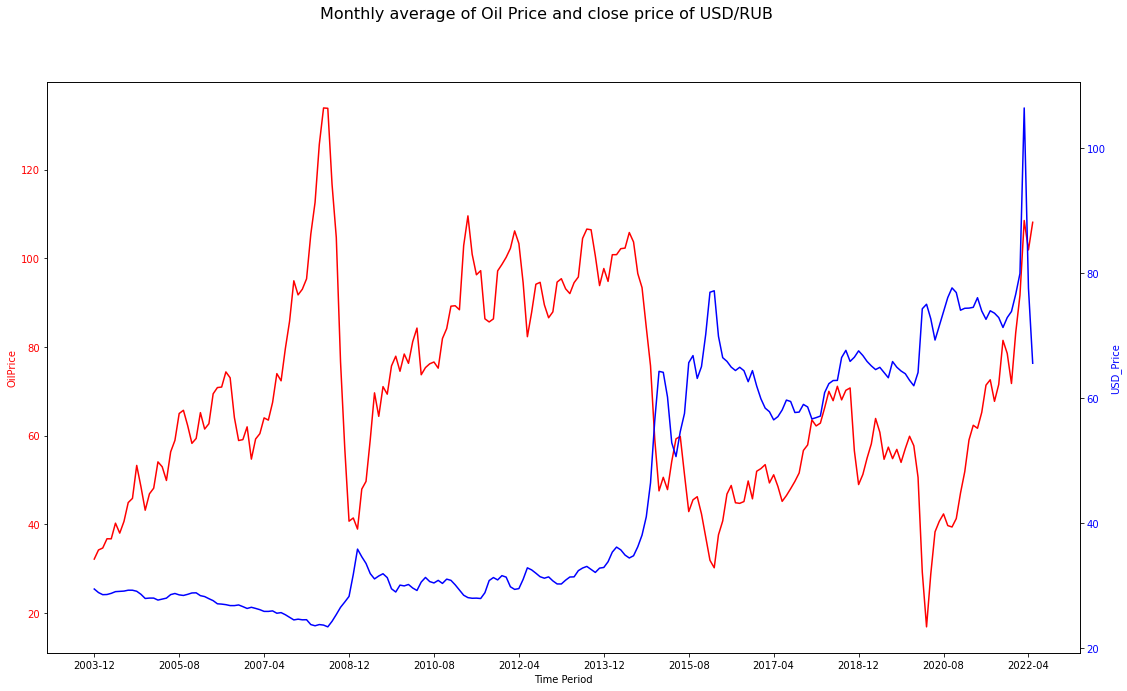

In [26]:
# Define Data
x = all_curr_wti['Calendar_date'].astype(str)
data_1 = all_curr_wti['OilPrice']
data_2 = all_curr_wti['USD_Price']
#creating an array with percentage change of oilprice from one month to another
data_3 = all_curr_wti['OilPrice'].pct_change()  

# Create Plot
fig, ax1 = plt.subplots() 
fig.set_size_inches(18.5, 10.5)
  
ax1.set_xlabel('Time Period') 
ax1.set_ylabel('OilPrice', color = 'red') 
ax1.plot(x, data_1, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('USD_Price', color = 'blue') 
ax2.plot(x, data_2, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
# Reduce xtick label
ax1.xaxis.set_major_locator(plt.MaxNLocator(15))
fig.suptitle("Monthly average of Oil Price and close price of USD/RUB",fontsize = 16)
# Show plot

plt.show()

In [27]:
all_curr_wti

,Calendar_date,USD_Price,USD_Open,USD_High,USD_Low,Change %_x,EUR_Price,EUR_Open,EUR_High,EUR_Low,Change %_y,OilPrice,Overnight_int_rate,Inflation_rate
0,2003-12,29.413304,29.428435,29.451174,29.381913,-0.073913,36.210087,36.133957,36.326087,35.993348,0.138261,32.157826,20.000000,1.10
1,2004-01,28.844485,28.873500,28.895258,28.819167,-0.116364,36.344273,36.386409,36.605682,36.130045,-0.150455,34.210758,16.727273,1.75
2,2004-02,28.506100,28.500100,28.544400,28.473200,-0.001500,36.018200,35.990750,36.256350,35.789250,0.010500,34.658333,14.000000,0.99
3,2004-03,28.532304,28.530609,28.556174,28.505739,-0.000870,34.994696,35.007391,35.230739,34.767000,-0.060870,36.741304,14.000000,0.75
4,2004-04,28.718864,28.693727,28.744727,28.672182,0.079091,34.456409,34.453045,34.634636,34.232364,-0.044091,36.723636,14.000000,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022-01,76.617710,76.487933,77.184152,75.935757,0.175714,86.711238,86.594429,87.404667,85.948476,0.142381,83.200317,9.500000,0.99
218,2022-02,79.942150,78.708405,81.262335,77.132105,1.726000,88.795900,87.858600,90.404350,87.041700,1.044500,91.673500,10.575000,1.17
219,2022-03,106.447391,105.951957,111.294535,101.504461,-0.884348,113.299435,115.651522,120.643522,108.037174,-0.589130,108.502609,21.000000,7.61
220,2022-04,77.603810,78.186667,78.893571,76.419238,-0.735238,86.671095,87.614952,89.549238,83.795476,-0.715238,101.877302,15.571429,1.56


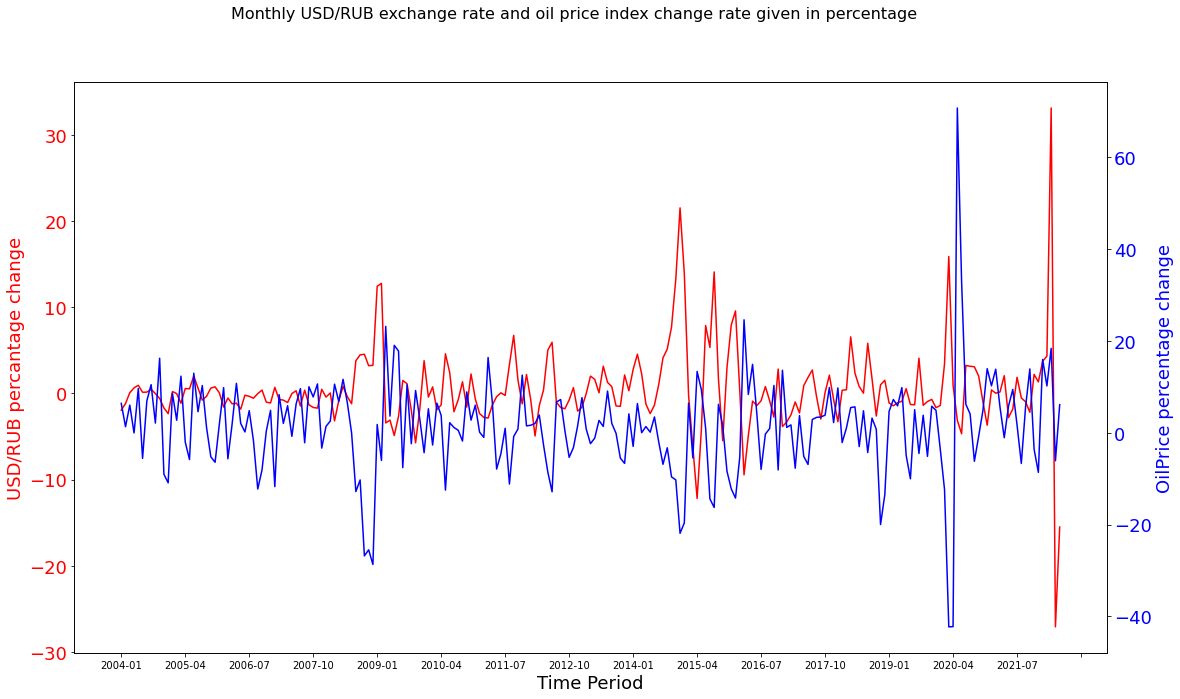

In [28]:
# Define Data
change = all_curr_wti.copy()
#adding the column with percentage change of USD/RUB from one month to another to the dataframe for visualization
change['USD_Price_PCT'] = change['USD_Price'].pct_change()*100

#adding the column with percentage change of oilrpice from one month to another to the main dataframe
change['OilPrice_PCT'] = change['OilPrice'].pct_change()*100

#dropna because the first na does not have the change 
change = change.dropna()

#array with percentage change of USD/RUB from one month to another to the dataframe for visualization
data_3 = change['USD_Price_PCT']

#array with percentage change of oilprice from one month to another to the dataframe for visualization
data_4 = change['OilPrice_PCT']

x = change['Calendar_date'].astype(str)

# Create Plot
fig, ax1 = plt.subplots() 
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Time Period',fontsize = 18) 
ax1.set_ylabel('USD/RUB percantage change', color = 'red',fontsize = 18) 
ax1.plot(x, data_3, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red',labelsize = 18) 
ax1.grid(False)
ax1.set_facecolor('xkcd:white')

# Adding Twin Axes
ax2 = ax1.twinx() 
ax2.set_ylabel('OilPrice percentage change', color = 'blue',fontsize = 18) 
ax2.plot(x, data_4, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue',labelsize = 18)
ax2.grid(False)
ax2.set_facecolor('xkcd:white')

# Reduce xtick label
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
fig.suptitle("Monthly USD/RUB exchange rate and oil price index change rate given in percentage", fontsize = 16)

# Show plot
plt.show()

In [29]:
all_curr_wti

,Calendar_date,USD_Price,USD_Open,USD_High,USD_Low,Change %_x,EUR_Price,EUR_Open,EUR_High,EUR_Low,Change %_y,OilPrice,Overnight_int_rate,Inflation_rate
0,2003-12,29.413304,29.428435,29.451174,29.381913,-0.073913,36.210087,36.133957,36.326087,35.993348,0.138261,32.157826,20.000000,1.10
1,2004-01,28.844485,28.873500,28.895258,28.819167,-0.116364,36.344273,36.386409,36.605682,36.130045,-0.150455,34.210758,16.727273,1.75
2,2004-02,28.506100,28.500100,28.544400,28.473200,-0.001500,36.018200,35.990750,36.256350,35.789250,0.010500,34.658333,14.000000,0.99
3,2004-03,28.532304,28.530609,28.556174,28.505739,-0.000870,34.994696,35.007391,35.230739,34.767000,-0.060870,36.741304,14.000000,0.75
4,2004-04,28.718864,28.693727,28.744727,28.672182,0.079091,34.456409,34.453045,34.634636,34.232364,-0.044091,36.723636,14.000000,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022-01,76.617710,76.487933,77.184152,75.935757,0.175714,86.711238,86.594429,87.404667,85.948476,0.142381,83.200317,9.500000,0.99
218,2022-02,79.942150,78.708405,81.262335,77.132105,1.726000,88.795900,87.858600,90.404350,87.041700,1.044500,91.673500,10.575000,1.17
219,2022-03,106.447391,105.951957,111.294535,101.504461,-0.884348,113.299435,115.651522,120.643522,108.037174,-0.589130,108.502609,21.000000,7.61
220,2022-04,77.603810,78.186667,78.893571,76.419238,-0.735238,86.671095,87.614952,89.549238,83.795476,-0.715238,101.877302,15.571429,1.56


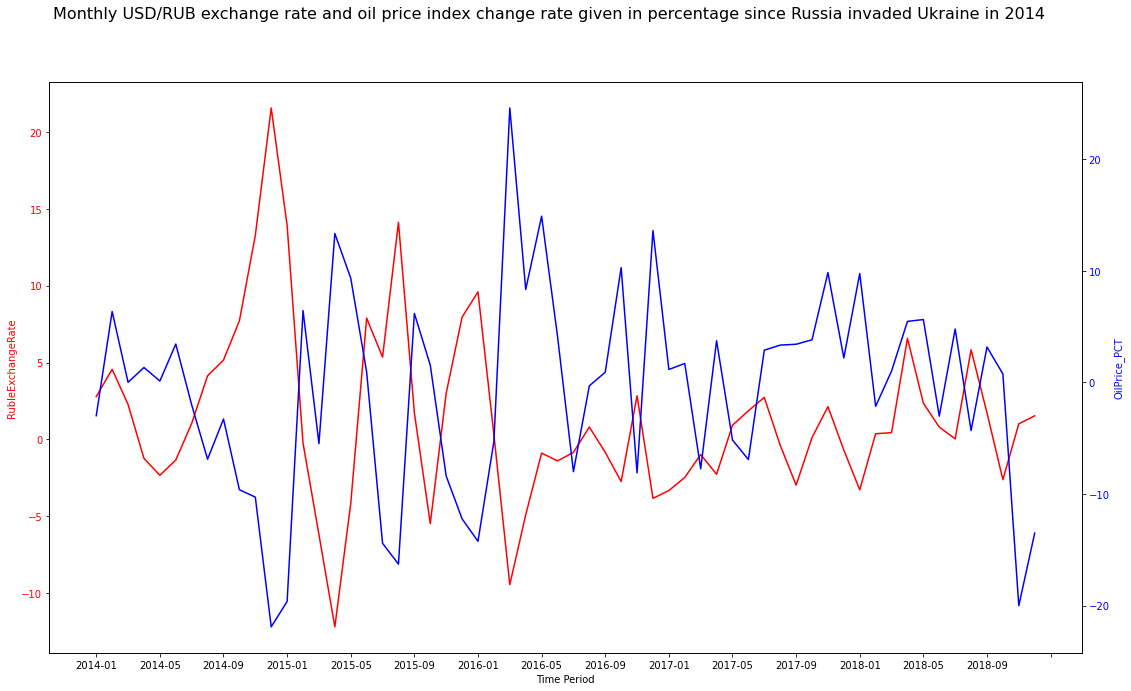

In [30]:
# Define Data to get a narrower time period 
data_3 = data_3.loc[121:180]
data_4 = data_4.loc[121:180]
x= x.iloc[120:180]

# Create Plot
fig, ax1 = plt.subplots() 
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Monthly USD/RUB exchange rate and oil price index change rate given in percentage since Russia invaded Ukraine in 2014", fontsize = 16)

ax1.set_xlabel('Time Period') 
ax1.set_ylabel('RubleExchangeRate', color = 'red') 
ax1.plot(x, data_3, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('OilPrice_PCT', color = 'blue') 
ax2.plot(x, data_4, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue')

# Reduce xtick label
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))

# Show plot
plt.show()

In [31]:
all_curr_wti

,Calendar_date,USD_Price,USD_Open,USD_High,USD_Low,Change %_x,EUR_Price,EUR_Open,EUR_High,EUR_Low,Change %_y,OilPrice,Overnight_int_rate,Inflation_rate
0,2003-12,29.413304,29.428435,29.451174,29.381913,-0.073913,36.210087,36.133957,36.326087,35.993348,0.138261,32.157826,20.000000,1.10
1,2004-01,28.844485,28.873500,28.895258,28.819167,-0.116364,36.344273,36.386409,36.605682,36.130045,-0.150455,34.210758,16.727273,1.75
2,2004-02,28.506100,28.500100,28.544400,28.473200,-0.001500,36.018200,35.990750,36.256350,35.789250,0.010500,34.658333,14.000000,0.99
3,2004-03,28.532304,28.530609,28.556174,28.505739,-0.000870,34.994696,35.007391,35.230739,34.767000,-0.060870,36.741304,14.000000,0.75
4,2004-04,28.718864,28.693727,28.744727,28.672182,0.079091,34.456409,34.453045,34.634636,34.232364,-0.044091,36.723636,14.000000,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022-01,76.617710,76.487933,77.184152,75.935757,0.175714,86.711238,86.594429,87.404667,85.948476,0.142381,83.200317,9.500000,0.99
218,2022-02,79.942150,78.708405,81.262335,77.132105,1.726000,88.795900,87.858600,90.404350,87.041700,1.044500,91.673500,10.575000,1.17
219,2022-03,106.447391,105.951957,111.294535,101.504461,-0.884348,113.299435,115.651522,120.643522,108.037174,-0.589130,108.502609,21.000000,7.61
220,2022-04,77.603810,78.186667,78.893571,76.419238,-0.735238,86.671095,87.614952,89.549238,83.795476,-0.715238,101.877302,15.571429,1.56


# Model Building

# Linear Regression Model

In [32]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression


# matplotlib and seaborn are used for plotting graphs
%matplotlib inline
plt.style.use('seaborn-darkgrid')


Trial N1 

In [33]:
all_curr_wti

,Calendar_date,USD_Price,USD_Open,USD_High,USD_Low,Change %_x,EUR_Price,EUR_Open,EUR_High,EUR_Low,Change %_y,OilPrice,Overnight_int_rate,Inflation_rate
0,2003-12,29.413304,29.428435,29.451174,29.381913,-0.073913,36.210087,36.133957,36.326087,35.993348,0.138261,32.157826,20.000000,1.10
1,2004-01,28.844485,28.873500,28.895258,28.819167,-0.116364,36.344273,36.386409,36.605682,36.130045,-0.150455,34.210758,16.727273,1.75
2,2004-02,28.506100,28.500100,28.544400,28.473200,-0.001500,36.018200,35.990750,36.256350,35.789250,0.010500,34.658333,14.000000,0.99
3,2004-03,28.532304,28.530609,28.556174,28.505739,-0.000870,34.994696,35.007391,35.230739,34.767000,-0.060870,36.741304,14.000000,0.75
4,2004-04,28.718864,28.693727,28.744727,28.672182,0.079091,34.456409,34.453045,34.634636,34.232364,-0.044091,36.723636,14.000000,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022-01,76.617710,76.487933,77.184152,75.935757,0.175714,86.711238,86.594429,87.404667,85.948476,0.142381,83.200317,9.500000,0.99
218,2022-02,79.942150,78.708405,81.262335,77.132105,1.726000,88.795900,87.858600,90.404350,87.041700,1.044500,91.673500,10.575000,1.17
219,2022-03,106.447391,105.951957,111.294535,101.504461,-0.884348,113.299435,115.651522,120.643522,108.037174,-0.589130,108.502609,21.000000,7.61
220,2022-04,77.603810,78.186667,78.893571,76.419238,-0.735238,86.671095,87.614952,89.549238,83.795476,-0.715238,101.877302,15.571429,1.56


In [34]:
# Define explanatory variable
all_curr_wti['next_month_price'] = all_curr_wti['USD_Price'].shift(-1)
all_curr_wti = all_curr_wti.dropna()
#all_curr_wti = WTIRUB.dropna()
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','Change %_x','EUR_Price','EUR_Price','EUR_High','EUR_Low','Change %_y','OilPrice','Overnight_int_rate','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# R square
r2_score = linear.score(X_train, y_train)*100
float("{0:.10f}".format(r2_score))
print ("Training accuracy:",r2_score)

# R square
r2_score = linear.score(X_test, y_test)*100
float("{0:.10f}".format(r2_score))
print ("Testing accuracy:",r2_score)

Training accuracy: 99.18581514498842
Testing accuracy: 72.09422352994031


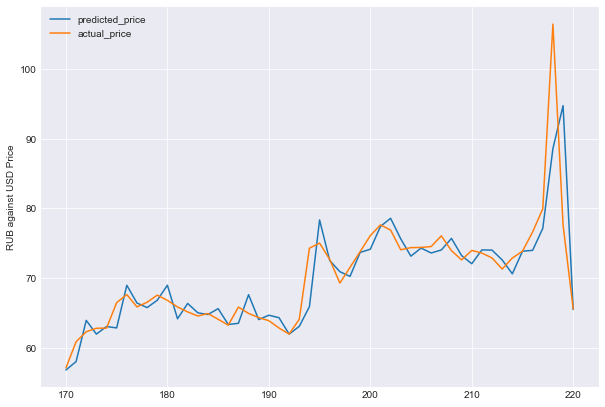

In [35]:
# Predicting RUB against USD Price
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['USD_Price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("RUB against USD Price")
plt.show()

In [36]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance

Feature: 0, Score: -0.124
Feature: 1, Score: -3.228
Feature: 2, Score: 2.045
Feature: 3, Score: 2.341
Feature: 4, Score: 3.857
Feature: 5, Score: -2.782
Feature: 6, Score: -2.782
Feature: 7, Score: 1.955
Feature: 8, Score: 3.580
Feature: 9, Score: 4.196
Feature: 10, Score: 0.003
Feature: 11, Score: -0.023
Feature: 12, Score: -0.300


In [37]:
#Prediction for the May outcome of USD/RUB exchange rate
may_x = [[65.568854,66.375938,67.029340,64.674931,-1.205833,69.304250,70.280875,71.510063,67.091437,-1.271875,108.102500,15.000000,0.15]]
print('June prediction for USD/RUB exchange rate: %.3f'% linear.predict(may_x))
stdev = np.sqrt(sum((linear.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print('Confidence interval %.3f \
- %.3f' % (linear.predict(may_x) - 1.96*stdev, linear.predict(may_x) + 1.96*stdev))

June prediction for USD/RUB exchange rate: 48.491
Confidence interval 45.978 - 51.004


In [38]:
from sklearn.metrics import mean_absolute_percentage_error
print('mean_absolute_percentage_error: %.3f'%(mean_absolute_percentage_error(y_test, predicted_price)*100))

mean_absolute_percentage_error: 2.677


In [39]:
# Define explanatory variable
all_curr_wti['next_month_price'] = all_curr_wti['USD_Price'].shift(-1)
all_curr_wti = all_curr_wti.dropna()
#all_curr_wti = WTIRUB.dropna()
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','OilPrice','Overnight_int_rate','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# R square
r2_score = linear.score(X_train, y_train)*100
float("{0:.10f}".format(r2_score))
print ("Training accuracy:",r2_score)

# R square
r2_score = linear.score(X_test, y_test)*100
float("{0:.10f}".format(r2_score))
print ("Testing accuracy:",r2_score)

Training accuracy: 99.05156498182178
Testing accuracy: 53.565400790125665


/var/folders/hh/b9jhpyvd09x3thlbfkdlhz1c0000gn/T/ipykernel_1961/3386279471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_curr_wti['next_month_price'] = all_curr_wti['USD_Price'].shift(-1)


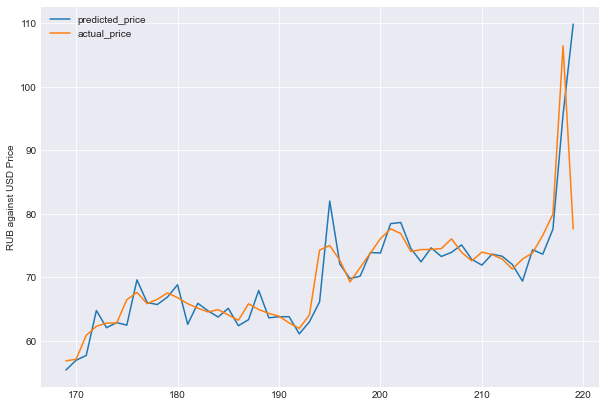

In [40]:
# Predicting RUB against USD Price
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['USD_Price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("RUB against USD Price")
plt.show()

In [41]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance

Feature: 0, Score: 12.494
Feature: 1, Score: -15.735
Feature: 2, Score: 2.286
Feature: 3, Score: 1.933
Feature: 4, Score: -0.004
Feature: 5, Score: -0.070
Feature: 6, Score: -0.500


In [42]:
#Prediction for the May outcome of USD/RUB exchange rate
may_x = [[65.568854,66.375938,67.029340,64.674931,108.102500,15.000000,0.15]]
print('June prediction for USD/RUB exchange rate: %.3f'% linear.predict(may_x))
stdev = np.sqrt(sum((linear.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print('Confidence interval %.3f \
- %.3f' % (linear.predict(may_x) - 1.96*stdev, linear.predict(may_x) + 1.96*stdev))

June prediction for USD/RUB exchange rate: 53.609
Confidence interval 50.904 - 56.314


In [43]:
print('mean_absolute_percentage_error: %.3f'%(mean_absolute_percentage_error(y_test, predicted_price)*100))

mean_absolute_percentage_error: 3.169


In [44]:
# Define explanatory variable
all_curr_wti['next_month_price'] = all_curr_wti['USD_Price'].shift(-1)
all_curr_wti = all_curr_wti.dropna()
#all_curr_wti = WTIRUB.dropna()
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','OilPrice','Overnight_int_rate','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# R square
r2_score = linear.score(X_train, y_train)*100
float("{0:.10f}".format(r2_score))
print ("Training accuracy:",r2_score)

# R square
r2_score = linear.score(X_test, y_test)*100
float("{0:.10f}".format(r2_score))
print ("Testing accuracy:",r2_score)

Training accuracy: 99.04474512850527
Testing accuracy: 88.38550964315323


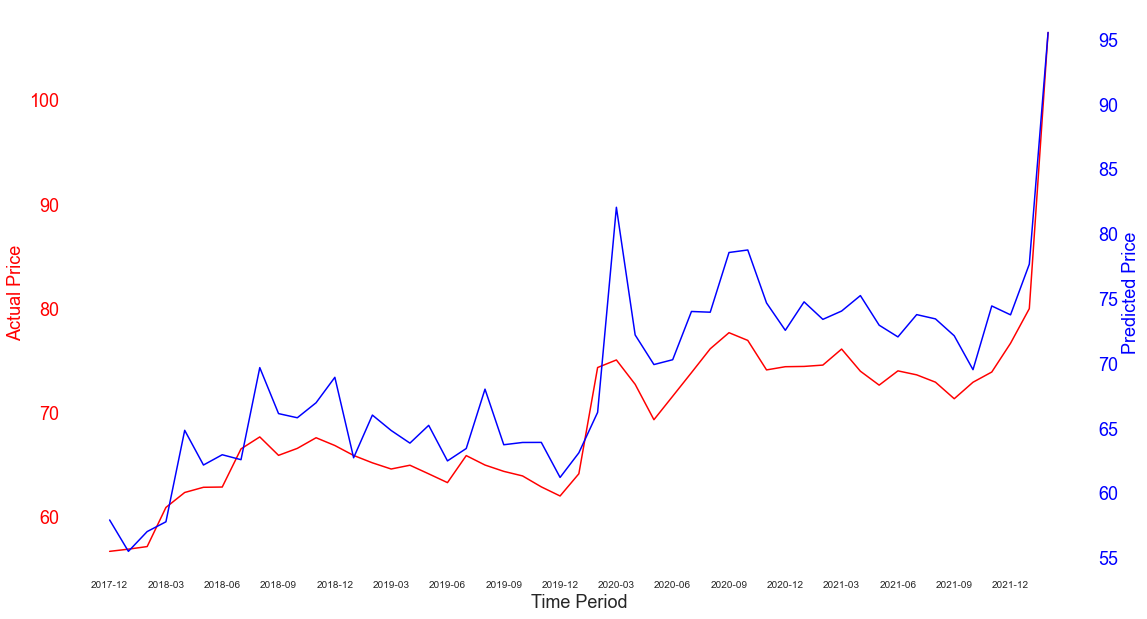

In [45]:
# Predicting RUB against USD Price
predicted_price = linear.predict(X_test)
#predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['USD_Price'])


# Define Data to get a narrower time period 
x= all_curr_wti['Calendar_date'][t:].astype(str)

# Create Plot
fig, ax1 = plt.subplots() 
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Time Period',fontsize = 18) 
ax1.set_ylabel('Actual Price', color = 'red',fontsize = 18) 
ax1.plot(x, y_test, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red',labelsize = 18) 
ax1.grid(False)
ax1.set_facecolor('xkcd:white')

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Predicted Price', color = 'blue',fontsize = 18) 
ax2.plot(x, predicted_price, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue',labelsize = 18)
ax2.grid(False)
ax2.set_facecolor('xkcd:white')
# Reduce xtick label
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
# Show plot
plt.show()

In [46]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance

Feature: 0, Score: 12.416
Feature: 1, Score: -15.731
Feature: 2, Score: 2.288
Feature: 3, Score: 2.007
Feature: 4, Score: -0.004
Feature: 5, Score: -0.075
Feature: 6, Score: -0.489


In [47]:
#Prediction for the May outcome of USD/RUB exchange rate
may_x = [[65.568854,66.375938,67.029340,64.674931,108.102500,15.000000,0.15]]
print('June prediction for USD/RUB exchange rate: %.3f'% linear.predict(may_x))
stdev = np.sqrt(sum((linear.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print('Confidence interval %.3f \
- %.3f' % (linear.predict(may_x) - 1.96*stdev, linear.predict(may_x) + 1.96*stdev))

June prediction for USD/RUB exchange rate: 53.590
Confidence interval 50.883 - 56.296


In [48]:
print('mean_absolute_percentage_error: %.3f'%(mean_absolute_percentage_error(y_test, predicted_price)*100))

mean_absolute_percentage_error: 2.393


In [49]:
# Define explanatory variable
all_curr_wti['next_month_price'] = all_curr_wti['USD_Price'].shift(-1)
all_curr_wti = all_curr_wti.dropna()
#all_curr_wti = WTIRUB.dropna()
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','EUR_Price','EUR_Price','EUR_High','EUR_Low','OilPrice','Overnight_int_rate','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# R square
r2_score = linear.score(X_train, y_train)*100
float("{0:.10f}".format(r2_score))
print ("Training accuracy:",r2_score)

# R square
r2_score = linear.score(X_test, y_test)*100
float("{0:.10f}".format(r2_score))
print ("Testing accuracy:",r2_score)

Training accuracy: 99.05377833209886
Testing accuracy: 87.38598930365299


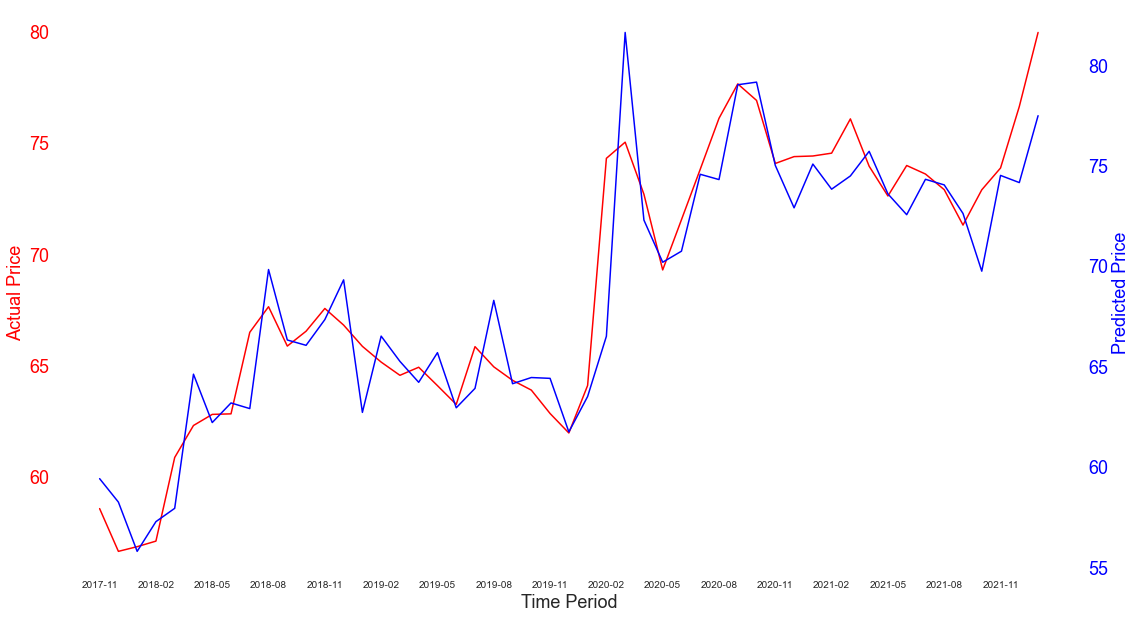

In [50]:
# Predicting RUB against USD Price
predicted_price = linear.predict(X_test)
#predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['USD_Price'])


# Define Data to get a narrower time period 
x= all_curr_wti['Calendar_date'][t:].astype(str)

# Create Plot
fig, ax1 = plt.subplots() 
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Time Period',fontsize = 18) 
ax1.set_ylabel('Actual Price', color = 'red',fontsize = 18) 
ax1.plot(x, y_test, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red',labelsize = 18) 
ax1.grid(False)
ax1.set_facecolor('xkcd:white')

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Predicted Price', color = 'blue',fontsize = 18) 
ax2.plot(x, predicted_price, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue',labelsize = 18)
ax2.grid(False)
ax2.set_facecolor('xkcd:white')
# Reduce xtick label
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
# Show plot
plt.show()

In [51]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance

Feature: 0, Score: 12.745
Feature: 1, Score: -15.290
Feature: 2, Score: 2.001
Feature: 3, Score: 1.534
Feature: 4, Score: 0.719
Feature: 5, Score: 0.719
Feature: 6, Score: -1.502
Feature: 7, Score: 0.067
Feature: 8, Score: -0.008
Feature: 9, Score: -0.108
Feature: 10, Score: -0.496


In [52]:
#Prediction for the May outcome of USD/RUB exchange rate
may_x = [[65.568854,66.375938,67.029340,64.674931,69.304250,70.280875,71.510063,67.091437,108.102500,15.000000,0.15]]
print('June prediction for USD/RUB exchange rate: %.3f'% linear.predict(may_x))
stdev = np.sqrt(sum((linear.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print('Confidence interval %.3f \
- %.3f' % (linear.predict(may_x) - 1.96*stdev, linear.predict(may_x) + 1.96*stdev))

June prediction for USD/RUB exchange rate: 51.579
Confidence interval 48.897 - 54.261


In [53]:
print('mean_absolute_percentage_error: %.3f'%(mean_absolute_percentage_error(y_test, predicted_price)*100))

mean_absolute_percentage_error: 2.250


In [54]:
# Define explanatory variable
all_curr_wti['next_month_price'] = all_curr_wti['USD_Price'].shift(-1)
all_curr_wti = all_curr_wti.dropna()
#all_curr_wti = WTIRUB.dropna()
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','OilPrice']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# R square
r2_score = linear.score(X_train, y_train)*100
float("{0:.10f}".format(r2_score))
print ("Training accuracy:",r2_score)

# R square
r2_score = linear.score(X_test, y_test)*100
float("{0:.10f}".format(r2_score))
print ("Testing accuracy:",r2_score)

Training accuracy: 98.98763455067535
Testing accuracy: 86.89561451228916


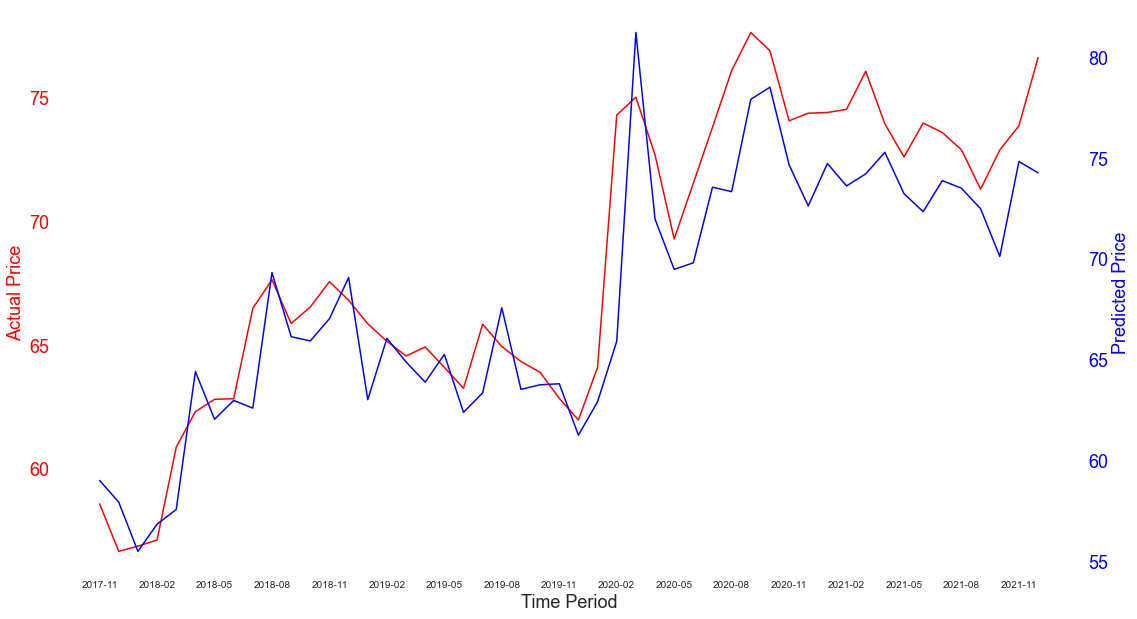

In [55]:
# Predicting RUB against USD Price
predicted_price = linear.predict(X_test)
#predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['USD_Price'])


# Define Data to get a narrower time period 
x= all_curr_wti['Calendar_date'][t:].astype(str)

# Create Plot
fig, ax1 = plt.subplots() 
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Time Period',fontsize = 18) 
ax1.set_ylabel('Actual Price', color = 'red',fontsize = 18) 
ax1.plot(x, y_test, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red',labelsize = 18) 
ax1.grid(False)
ax1.set_facecolor('xkcd:white')

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Predicted Price', color = 'blue',fontsize = 18) 
ax2.plot(x, predicted_price, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue',labelsize = 18)
ax2.grid(False)
ax2.set_facecolor('xkcd:white')
# Reduce xtick label
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
# Show plot
plt.show()


In [56]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance

Feature: 0, Score: 13.300
Feature: 1, Score: -14.385
Feature: 2, Score: 0.857
Feature: 3, Score: 1.226
Feature: 4, Score: 0.005


In [57]:
#Prediction for the May outcome of USD/RUB exchange rate
may_x = [[65.568854,66.375938,67.029340,64.674931,108.102500]]
print('June prediction for USD/RUB exchange rate: %.3f'% linear.predict(may_x))
stdev = np.sqrt(sum((linear.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print('Confidence interval %.3f \
- %.3f' % (linear.predict(may_x) - 1.96*stdev, linear.predict(may_x) + 1.96*stdev))

June prediction for USD/RUB exchange rate: 54.307
Confidence interval 51.533 - 57.082


In [58]:
print('mean_absolute_percentage_error: %.3f'%(mean_absolute_percentage_error(y_test, predicted_price)*100))

mean_absolute_percentage_error: 2.155


In [59]:
# Define explanatory variable
all_curr_wti['next_month_price'] = all_curr_wti['USD_Price'].shift(-1)
all_curr_wti = all_curr_wti.dropna()
#all_curr_wti = WTIRUB.dropna()
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','EUR_Price','EUR_Price','EUR_High','EUR_Low','OilPrice']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# R square
r2_score = linear.score(X_train, y_train)*100
float("{0:.10f}".format(r2_score))
print ("Training accuracy:",r2_score)

# R square
r2_score = linear.score(X_test, y_test)*100
float("{0:.10f}".format(r2_score))
print ("Testing accuracy:",r2_score)

Training accuracy: 98.98674930958664
Testing accuracy: 87.57103405240042


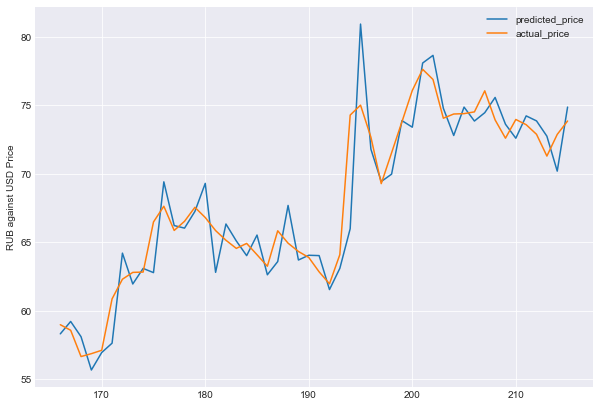

In [60]:
# Predicting RUB against USD Price
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['USD_Price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("RUB against USD Price")
plt.show()

In [61]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance

Feature: 0, Score: 13.359
Feature: 1, Score: -13.958
Feature: 2, Score: 0.673
Feature: 3, Score: 0.925
Feature: 4, Score: 0.962
Feature: 5, Score: 0.962
Feature: 6, Score: -1.509
Feature: 7, Score: -0.407
Feature: 8, Score: 0.004


In [62]:
#Prediction for the May outcome of USD/RUB exchange rate
may_x = [[65.568854,66.375938,67.029340,64.674931,69.304250,70.280875,71.510063,67.091437,108.102500]]
print('June prediction for USD/RUB exchange rate: %.3f'% linear.predict(may_x))
stdev = np.sqrt(sum((linear.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print('Confidence interval %.3f \
- %.3f' % (linear.predict(may_x) - 1.96*stdev, linear.predict(may_x) + 1.96*stdev))

June prediction for USD/RUB exchange rate: 53.576
Confidence interval 50.813 - 56.338


In [63]:
print('mean_absolute_percentage_error: %.3f'%(mean_absolute_percentage_error(y_test, predicted_price)*100))

mean_absolute_percentage_error: 2.133


In [64]:
X = all_curr_wti[['EUR_Price','EUR_Price','EUR_High','EUR_Low','Change %_y','OilPrice','Overnight_int_rate','Inflation_rate']]

# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# R square
r2_score = linear.score(X_train, y_train)*100
float("{0:.10f}".format(r2_score))
print ("Training accuracy:",r2_score)

# R square
r2_score = linear.score(X_test, y_test)*100
float("{0:.10f}".format(r2_score))
print ("Testing accuracy:",r2_score)

Training accuracy: 96.97713006405573
Testing accuracy: 53.874304280939775


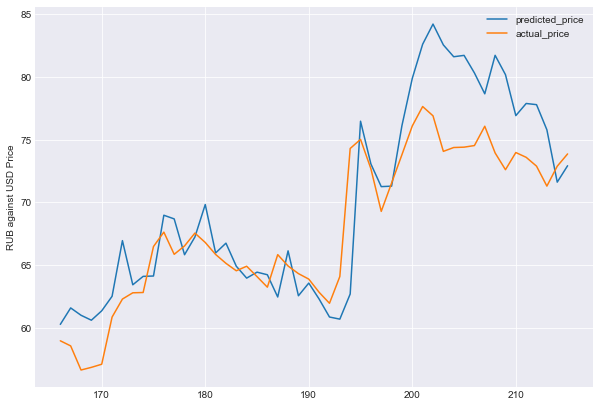

In [65]:
# Predicting RUB against USD Price
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['USD_Price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("RUB against USD Price")
plt.show()

In [66]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance

Feature: 0, Score: -2.313
Feature: 1, Score: -2.313
Feature: 2, Score: 1.477
Feature: 3, Score: 4.149
Feature: 4, Score: 6.519
Feature: 5, Score: -0.065
Feature: 6, Score: 0.116
Feature: 7, Score: -0.774


In [67]:
#Prediction for the May outcome of USD/RUB exchange rate
may_x = [[69.304250,70.280875,71.510063,67.091437,-1.271875,108.102500,15.000000,0.15]]
print('June prediction for USD/RUB exchange rate: %.3f'% linear.predict(may_x))
stdev = np.sqrt(sum((linear.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print('Confidence interval %.3f \
- %.3f' % (linear.predict(may_x) - 1.96*stdev, linear.predict(may_x) + 1.96*stdev))

June prediction for USD/RUB exchange rate: 42.906
Confidence interval 38.135 - 47.678


In [68]:
print('mean_absolute_percentage_error: %.3f'%(mean_absolute_percentage_error(y_test, predicted_price)*100))

mean_absolute_percentage_error: 4.347


In [69]:
#all_curr_wti = WTIRUB.dropna()
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','Change %_x','OilPrice','Overnight_int_rate','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# R square
r2_score = linear.score(X_train, y_train)*100
float("{0:.10f}".format(r2_score))
print ("Training accuracy:",r2_score)

# R square
r2_score = linear.score(X_test, y_test)*100
float("{0:.10f}".format(r2_score))
print ("Testing accuracy:",r2_score)

Training accuracy: 99.0540228458429
Testing accuracy: 88.22649949831587


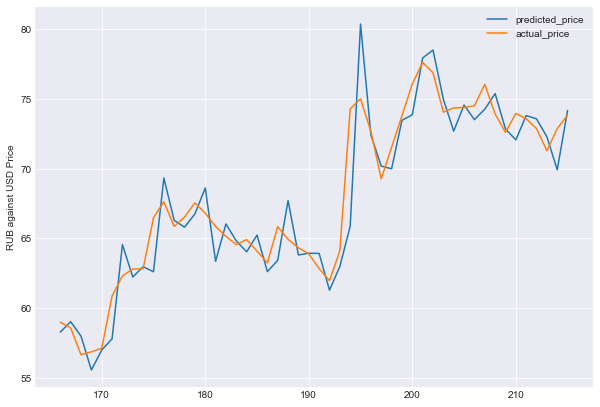

In [70]:
# Predicting RUB against USD Price
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['USD_Price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("RUB against USD Price")
plt.show()

In [71]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance

Feature: 0, Score: 3.318
Feature: 1, Score: -8.856
Feature: 2, Score: 3.139
Feature: 3, Score: 3.387
Feature: 4, Score: 4.059
Feature: 5, Score: -0.000
Feature: 6, Score: -0.040
Feature: 7, Score: -0.408


In [72]:
#Prediction for the May outcome of USD/RUB exchange rate
may_x = [[65.568854,66.375938,67.029340,64.674931,-1.205833,108.102500,15.000000,0.15]]
print('June prediction for USD/RUB exchange rate: %.3f'% linear.predict(may_x))
stdev = np.sqrt(sum((linear.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print('Confidence interval %.3f \
- %.3f' % (linear.predict(may_x) - 1.96*stdev, linear.predict(may_x) + 1.96*stdev))

June prediction for USD/RUB exchange rate: 54.806
Confidence interval 52.137 - 57.476


In [73]:
print('mean_absolute_percentage_error: %.3f'%(mean_absolute_percentage_error(y_test, predicted_price)*100))

mean_absolute_percentage_error: 2.029


In [74]:
#all_curr_wti = WTIRUB.dropna()
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','Change %_x','EUR_Price','EUR_Price','EUR_High','EUR_Low','Change %_y','Overnight_int_rate','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# R square
r2_score = linear.score(X_train, y_train)*100
float("{0:.10f}".format(r2_score))
print ("Training accuracy:",r2_score)

# R square
r2_score = linear.score(X_test, y_test)*100
float("{0:.10f}".format(r2_score))
print ("Testing accuracy:",r2_score)

Training accuracy: 99.15469101999238
Testing accuracy: 89.71143884522255


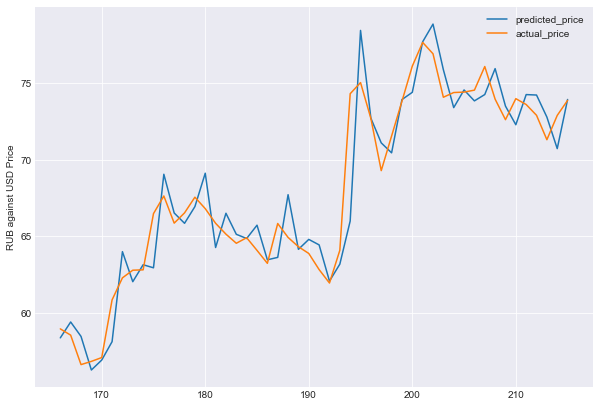

In [75]:
# Predicting RUB against USD Price
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['USD_Price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("RUB against USD Price")
plt.show()

In [76]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance

Feature: 0, Score: -0.107
Feature: 1, Score: -3.244
Feature: 2, Score: 2.013
Feature: 3, Score: 2.365
Feature: 4, Score: 3.848
Feature: 5, Score: -2.694
Feature: 6, Score: -2.694
Feature: 7, Score: 1.802
Feature: 8, Score: 3.569
Feature: 9, Score: 4.161
Feature: 10, Score: -0.039
Feature: 11, Score: -0.292


In [77]:
#Prediction for the May outcome of USD/RUB exchange rate
may_x = [[65.568854,66.375938,67.029340,64.674931,-1.205833,69.304250,70.280875,71.510063,67.091437,-1.271875,15.000000,0.15]]
print('June prediction for USD/RUB exchange rate: %.3f'% linear.predict(may_x))
stdev = np.sqrt(sum((linear.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print('Confidence interval %.3f \
- %.3f' % (linear.predict(may_x) - 1.96*stdev, linear.predict(may_x) + 1.96*stdev))

June prediction for USD/RUB exchange rate: 48.117
Confidence interval 45.594 - 50.640


In [78]:
print('mean_absolute_percentage_error: %.3f'%(mean_absolute_percentage_error(y_test, predicted_price)*100))

mean_absolute_percentage_error: 1.953


In [79]:
#all_curr_wti = WTIRUB.dropna()
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','Change %_x','EUR_Price','EUR_Price','EUR_High','EUR_Low','Change %_y','OilPrice','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# R square
r2_score = linear.score(X_train, y_train)*100
float("{0:.10f}".format(r2_score))
print ("Training accuracy:",r2_score)

# R square
r2_score = linear.score(X_test, y_test)*100
float("{0:.10f}".format(r2_score))
print ("Testing accuracy:",r2_score)

Training accuracy: 99.1543198277099
Testing accuracy: 89.73560368854861


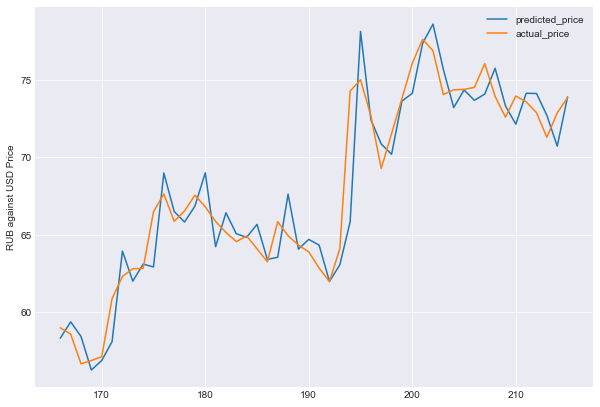

In [80]:
# Predicting RUB against USD Price
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['USD_Price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("RUB against USD Price")
plt.show()

In [81]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance

Feature: 0, Score: -0.464
Feature: 1, Score: -2.879
Feature: 2, Score: 1.961
Feature: 3, Score: 2.414
Feature: 4, Score: 3.973
Feature: 5, Score: -2.822
Feature: 6, Score: -2.822
Feature: 7, Score: 1.982
Feature: 8, Score: 3.642
Feature: 9, Score: 4.293
Feature: 10, Score: 0.004
Feature: 11, Score: -0.304


In [82]:
#Prediction for the May outcome of USD/RUB exchange rate
may_x = [[65.568854,66.375938,67.029340,64.674931,-1.205833,69.304250,70.280875,71.510063,67.091437,-1.271875,108.102500,0.15]]
print('June prediction for USD/RUB exchange rate: %.3f'% linear.predict(may_x))
stdev = np.sqrt(sum((linear.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print('Confidence interval %.3f \
- %.3f' % (linear.predict(may_x) - 1.96*stdev, linear.predict(may_x) + 1.96*stdev))

June prediction for USD/RUB exchange rate: 48.477
Confidence interval 45.953 - 51.000


In [83]:
print('mean_absolute_percentage_error: %.3f'%(mean_absolute_percentage_error(y_test, predicted_price)*100))

mean_absolute_percentage_error: 1.949


In [84]:
#all_curr_wti = WTIRUB.dropna()
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','Change %_x','EUR_Price','EUR_Price','EUR_High','EUR_Low','Change %_y','OilPrice','Overnight_int_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# R square
r2_score = linear.score(X_train, y_train)*100
float("{0:.10f}".format(r2_score))
print ("Training accuracy:",r2_score)

# R square
r2_score = linear.score(X_test, y_test)*100
float("{0:.10f}".format(r2_score))
print ("Testing accuracy:",r2_score)

Training accuracy: 99.14566899656126
Testing accuracy: 89.83960740356046


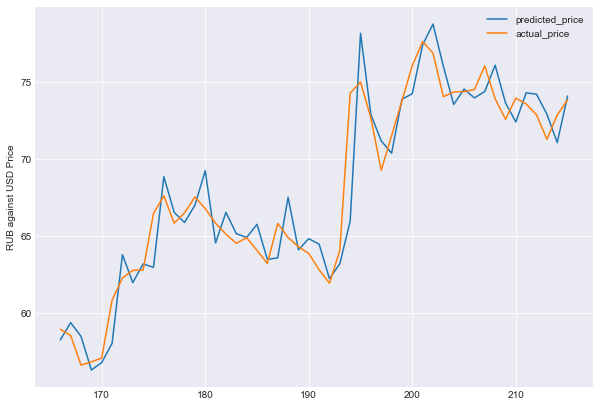

In [85]:
# Predicting RUB against USD Price
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['USD_Price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("RUB against USD Price")
plt.show()

In [86]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance

Feature: 0, Score: -0.869
Feature: 1, Score: -1.659
Feature: 2, Score: 1.484
Feature: 3, Score: 2.091
Feature: 4, Score: 4.154
Feature: 5, Score: -2.751
Feature: 6, Score: -2.751
Feature: 7, Score: 1.896
Feature: 8, Score: 3.574
Feature: 9, Score: 4.448
Feature: 10, Score: 0.003
Feature: 11, Score: -0.046


In [87]:
#Prediction for the May outcome of USD/RUB exchange rate
may_x = [[65.568854,66.375938,67.029340,64.674931,-1.205833,69.304250,70.280875,71.510063,67.091437,-1.271875,108.102500,15.000000]]
print('June prediction for USD/RUB exchange rate: %.3f'% linear.predict(may_x))
stdev = np.sqrt(sum((linear.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print('Confidence interval %.3f \
- %.3f' % (linear.predict(may_x) - 1.96*stdev, linear.predict(may_x) + 1.96*stdev))

June prediction for USD/RUB exchange rate: 48.482
Confidence interval 45.946 - 51.019


In [88]:
print('mean_absolute_percentage_error: %.3f'%(mean_absolute_percentage_error(y_test, predicted_price)*100))

mean_absolute_percentage_error: 1.965


In [89]:
X = all_curr_wti[['USD_Price','EUR_Price','Overnight_int_rate','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# R square
r2_score = linear.score(X_train, y_train)*100
float("{0:.10f}".format(r2_score))
print ("Training accuracy:",r2_score)

# R square
r2_score = linear.score(X_test, y_test)*100
float("{0:.10f}".format(r2_score))
print ("Testing accuracy:",r2_score)

Training accuracy: 98.08461922534858
Testing accuracy: 86.71101119316246


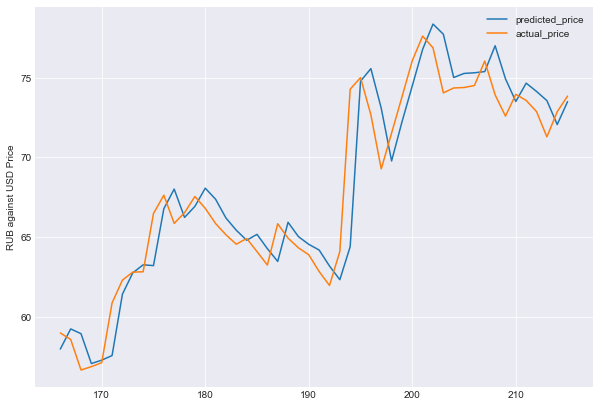

In [90]:
# Predicting RUB against USD Price
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['USD_Price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("RUB against USD Price")
plt.show()

In [91]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance

Feature: 0, Score: 0.963
Feature: 1, Score: 0.041
Feature: 2, Score: -0.086
Feature: 3, Score: 0.347


In [92]:
#Prediction for the May outcome of USD/RUB exchange rate
may_x = [[65.568854,69.304250, 15.000000,0.15]]
print('June prediction for USD/RUB exchange rate: %.3f'% linear.predict(may_x))
stdev = np.sqrt(sum((linear.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print('Confidence interval %.3f \
- %.3f' % (linear.predict(may_x) - 1.96*stdev, linear.predict(may_x) + 1.96*stdev))

June prediction for USD/RUB exchange rate: 65.063
Confidence interval 61.265 - 68.861


In [93]:
print('mean_absolute_percentage_error: %.3f'%(mean_absolute_percentage_error(y_test, predicted_price)*100))

mean_absolute_percentage_error: 2.171


In [94]:
#all_curr_wti = WTIRUB.dropna()
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','Change %_x','EUR_Price','EUR_Price','EUR_High','EUR_Low','Change %_y','OilPrice']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# R square
r2_score = linear.score(X_train, y_train)*100
float("{0:.10f}".format(r2_score))
print ("Training accuracy:",r2_score)

# R square
r2_score = linear.score(X_test, y_test)*100
float("{0:.10f}".format(r2_score))
print ("Testing accuracy:",r2_score)

Training accuracy: 99.14355710041404
Testing accuracy: 89.87362501765479


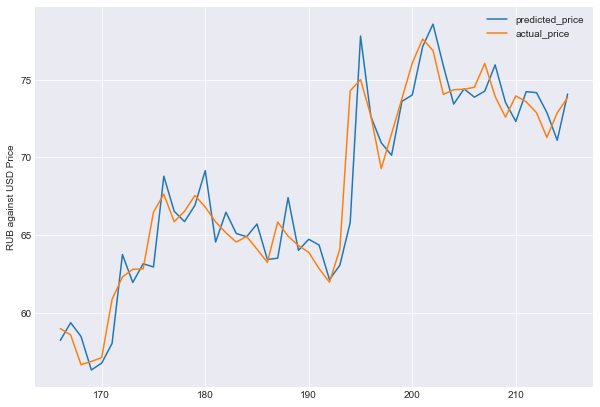

In [95]:
# Predicting RUB against USD Price
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['USD_Price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("RUB against USD Price")
plt.show()

In [96]:
# get importance
importance = linear.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance

Feature: 0, Score: -1.320
Feature: 1, Score: -1.176
Feature: 2, Score: 1.390
Feature: 3, Score: 2.150
Feature: 4, Score: 4.322
Feature: 5, Score: -2.893
Feature: 6, Score: -2.893
Feature: 7, Score: 2.087
Feature: 8, Score: 3.671
Feature: 9, Score: 4.591
Feature: 10, Score: 0.006


In [97]:
#Prediction for the May outcome of USD/RUB exchange rate
may_x = [[65.568854,66.375938,67.029340,64.674931,-1.205833,69.304250,70.280875,71.510063,67.091437,-1.271875,108.102500]]
print('June prediction for USD/RUB exchange rate: %.3f'% linear.predict(may_x))
stdev = np.sqrt(sum((linear.predict(X_train) - y_train)**2) / (len(y_train) - 2))
print('Confidence interval %.3f \
- %.3f' % (linear.predict(may_x) - 1.96*stdev, linear.predict(may_x) + 1.96*stdev))

June prediction for USD/RUB exchange rate: 48.748
Confidence interval 46.208 - 51.288


In [98]:
print('mean_absolute_percentage_error: %.3f'%(mean_absolute_percentage_error(y_test, predicted_price)*100))

mean_absolute_percentage_error: 1.946


# Conclusion: 
Building the model by dropping different features does not give conlusive results about the the most important and least imporant features. 
However, it was observed that the combination of either open and high, or low and close work better that any other combination of two of any of these features.
It was decided to keep the model with four features as it yiledls the highest training and testing accuracy.

# Deep learning model

In [99]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [100]:
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','Change %_x','EUR_Price','EUR_Price','EUR_High','EUR_Low','Change %_y','OilPrice','Overnight_int_rate','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [101]:
model = Sequential()

# Define model
model = Sequential()
model.add(Dense(500, input_dim=13, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_absolute_percentage_error"])
model.fit(X_train, y_train, epochs=100)

2022-06-16 00:23:16.465291: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 240.3889 - mean_absolute_percentage_error: 35.6166
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 25.8688 - mean_absolute_percentage_error: 9.7674
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 10.3889 - mean_absolute_percentage_error: 6.4434
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 9.6095 - mean_absolute_percentage_error: 5.9365
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 5.4375 - mean_absolute_percentage_error: 4.7756
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 5.8127 - mean_absolute_percentage_error: 4.9658
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 5.7928 - mean_absolute_percentage_error: 4.1391
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 5.8140 - mean_absolute_percentage_error: 4.9010
Epoch 9/100
6/6 [==========================

6/6 [==============================] - 0s 2ms/step - loss: 2.6491 - mean_absolute_percentage_error: 2.5949
Epoch 70/100
6/6 [==============================] - 0s 2ms/step - loss: 2.2888 - mean_absolute_percentage_error: 2.2033
Epoch 71/100
6/6 [==============================] - 0s 2ms/step - loss: 3.4760 - mean_absolute_percentage_error: 3.7621
Epoch 72/100
6/6 [==============================] - 0s 2ms/step - loss: 2.7790 - mean_absolute_percentage_error: 3.0344
Epoch 73/100
6/6 [==============================] - 0s 2ms/step - loss: 3.2698 - mean_absolute_percentage_error: 3.4393
Epoch 74/100
6/6 [==============================] - 0s 3ms/step - loss: 2.5581 - mean_absolute_percentage_error: 2.7894
Epoch 75/100
6/6 [==============================] - 0s 2ms/step - loss: 2.9922 - mean_absolute_percentage_error: 3.3981
Epoch 76/100
6/6 [==============================] - 0s 2ms/step - loss: 2.4363 - mean_absolute_percentage_error: 2.6076
Epoch 77/100
6/6 [==============================] - 0

In [102]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('mean_absolute_percentage_error:%.3f' %score[1])
may_x = [[65.568854,66.375938,67.029340,64.674931,-1.205833,69.304250,70.280875,71.510063,67.091437,-1.271875,108.102500,15.000000,0.15]]
predictions = model.predict(may_x)
print('June prediction for USD/RUB exchange rate: %.3f'% predictions)

y_testset = y_train.to_frame()
testdf = pd.DataFrame(y_testset)
testdf['pred_price'] = model.predict(X_train) 
testdf.astype(float)
stdev = np.sqrt(sum((testdf['pred_price'] - testdf['next_month_price'])**2) / (len(testdf['next_month_price']) - 2))
print('Confidence interval %.3f \
- %.3f' % (model.predict(may_x) - 1.96*stdev, model.predict(may_x) + 1.96*stdev))

Test loss: 4.529
mean_absolute_percentage_error:2.137
June prediction for USD/RUB exchange rate: 59.678
Confidence interval 56.685 - 62.672


In [103]:
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','OilPrice']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [104]:
model = Sequential()

# Define model
model = Sequential()
model.add(Dense(500, input_dim=5, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_absolute_percentage_error"])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 1221.9611 - mean_absolute_percentage_error: 87.4615
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 345.7094 - mean_absolute_percentage_error: 38.0124
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 134.1643 - mean_absolute_percentage_error: 31.1726
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 102.3642 - mean_absolute_percentage_error: 27.8764
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 31.9057 - mean_absolute_percentage_error: 11.0453
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 27.1314 - mean_absolute_percentage_error: 11.3800
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 10.3805 - mean_absolute_percentage_error: 5.5181
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 11.5058 - mean_absolute_percentage_error: 5.4964
Epoch 9/100
6/6 [============

6/6 [==============================] - 0s 2ms/step - loss: 3.7051 - mean_absolute_percentage_error: 2.9032
Epoch 70/100
6/6 [==============================] - 0s 2ms/step - loss: 4.3267 - mean_absolute_percentage_error: 3.0792
Epoch 71/100
6/6 [==============================] - 0s 2ms/step - loss: 4.4704 - mean_absolute_percentage_error: 4.1943
Epoch 72/100
6/6 [==============================] - 0s 2ms/step - loss: 4.2835 - mean_absolute_percentage_error: 3.0609
Epoch 73/100
6/6 [==============================] - 0s 2ms/step - loss: 3.7711 - mean_absolute_percentage_error: 2.9153
Epoch 74/100
6/6 [==============================] - 0s 2ms/step - loss: 3.8901 - mean_absolute_percentage_error: 3.3011
Epoch 75/100
6/6 [==============================] - 0s 3ms/step - loss: 3.7513 - mean_absolute_percentage_error: 2.8817
Epoch 76/100
6/6 [==============================] - 0s 2ms/step - loss: 3.7508 - mean_absolute_percentage_error: 2.7278
Epoch 77/100
6/6 [==============================] - 0

In [105]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('mean_absolute_percentage_error:%.3f' %score[1])
may_x = [[65.568854,66.375938,67.029340,64.674931,108.102500]]
predictions = model.predict(may_x)
print('June prediction for USD/RUB exchange rate: %.3f'% predictions)

y_testset = y_train.to_frame()
testdf = pd.DataFrame(y_testset)
testdf['pred_price'] = model.predict(X_train) 
testdf.astype(float)
stdev = np.sqrt(sum((testdf['pred_price'] - testdf['next_month_price'])**2) / (len(testdf['next_month_price']) - 2))
print('Confidence interval %.3f \
- %.3f' % (model.predict(may_x) - 1.96*stdev, model.predict(may_x) + 1.96*stdev))

Test loss: 4.796
mean_absolute_percentage_error:2.440
June prediction for USD/RUB exchange rate: 68.251
Confidence interval 64.469 - 72.033


In [106]:
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','OilPrice','Overnight_int_rate','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [107]:
model = Sequential()

# Define model
model = Sequential()
model.add(Dense(500, input_dim = 7, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_absolute_percentage_error"])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 6ms/step - loss: 843.9719 - mean_absolute_percentage_error: 59.1196
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 149.4047 - mean_absolute_percentage_error: 33.2442
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 61.3367 - mean_absolute_percentage_error: 20.4889
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 27.7295 - mean_absolute_percentage_error: 10.2979
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 9.1490 - mean_absolute_percentage_error: 5.6861
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 8.6987 - mean_absolute_percentage_error: 4.6385
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 7.1654 - mean_absolute_percentage_error: 5.3788
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 5.0654 - mean_absolute_percentage_error: 3.6782
Epoch 9/100
6/6 [====================

6/6 [==============================] - 0s 4ms/step - loss: 3.5854 - mean_absolute_percentage_error: 2.9944
Epoch 70/100
6/6 [==============================] - 0s 4ms/step - loss: 3.4981 - mean_absolute_percentage_error: 2.7642
Epoch 71/100
6/6 [==============================] - 0s 4ms/step - loss: 3.7001 - mean_absolute_percentage_error: 3.0980
Epoch 72/100
6/6 [==============================] - 0s 4ms/step - loss: 3.7641 - mean_absolute_percentage_error: 3.4020
Epoch 73/100
6/6 [==============================] - 0s 4ms/step - loss: 4.6061 - mean_absolute_percentage_error: 3.8701
Epoch 74/100
6/6 [==============================] - 0s 4ms/step - loss: 4.9628 - mean_absolute_percentage_error: 4.8211
Epoch 75/100
6/6 [==============================] - 0s 3ms/step - loss: 5.9251 - mean_absolute_percentage_error: 4.0217
Epoch 76/100
6/6 [==============================] - 0s 4ms/step - loss: 3.9407 - mean_absolute_percentage_error: 3.3228
Epoch 77/100
6/6 [==============================] - 0

In [108]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('mean_absolute_percentage_error:%.3f' %score[1])
may_x = [[65.568854,66.375938,67.029340,64.674931,108.102500,15.000000,0.15]]
predictions = model.predict(may_x)
print('June prediction for USD/RUB exchange rate: %.3f'% predictions)

y_testset = y_train.to_frame()
testdf = pd.DataFrame(y_testset)
testdf['pred_price'] = model.predict(X_train) 
testdf.astype(float)
stdev = np.sqrt(sum((testdf['pred_price'] - testdf['next_month_price'])**2) / (len(testdf['next_month_price']) - 2))
print('Confidence interval %.3f \
- %.3f' % (model.predict(may_x) - 1.96*stdev, model.predict(may_x) + 1.96*stdev))

Test loss: 7.812
mean_absolute_percentage_error:3.458
June prediction for USD/RUB exchange rate: 71.784
Confidence interval 67.907 - 75.661


In [109]:
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','EUR_Price','EUR_Price','EUR_High','EUR_Low','OilPrice','Overnight_int_rate','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [110]:
model = Sequential()

# Define model
model = Sequential()
model.add(Dense(500, input_dim=11, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_absolute_percentage_error"])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 2ms/step - loss: 711.6400 - mean_absolute_percentage_error: 56.7743
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 150.4342 - mean_absolute_percentage_error: 36.5460
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 28.2121 - mean_absolute_percentage_error: 11.0566
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 40.9913 - mean_absolute_percentage_error: 12.0213
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 9.1590 - mean_absolute_percentage_error: 6.3099
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 6.9608 - mean_absolute_percentage_error: 4.9263
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 6.5994 - mean_absolute_percentage_error: 4.5668
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 6.1662 - mean_absolute_percentage_error: 4.5406
Epoch 9/100
6/6 [=====================

6/6 [==============================] - 0s 3ms/step - loss: 3.8427 - mean_absolute_percentage_error: 2.8765
Epoch 70/100
6/6 [==============================] - 0s 3ms/step - loss: 4.6656 - mean_absolute_percentage_error: 3.6842
Epoch 71/100
6/6 [==============================] - 0s 3ms/step - loss: 3.9386 - mean_absolute_percentage_error: 3.1460
Epoch 72/100
6/6 [==============================] - 0s 4ms/step - loss: 4.2825 - mean_absolute_percentage_error: 3.4076
Epoch 73/100
6/6 [==============================] - 0s 4ms/step - loss: 5.2055 - mean_absolute_percentage_error: 4.8422
Epoch 74/100
6/6 [==============================] - 0s 3ms/step - loss: 6.6484 - mean_absolute_percentage_error: 4.5645
Epoch 75/100
6/6 [==============================] - 0s 3ms/step - loss: 4.8650 - mean_absolute_percentage_error: 4.0298
Epoch 76/100
6/6 [==============================] - 0s 3ms/step - loss: 4.9969 - mean_absolute_percentage_error: 3.5565
Epoch 77/100
6/6 [==============================] - 0

In [111]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('mean_absolute_percentage_error:%.3f' %score[1])
may_x = [[65.568854,66.375938,67.029340,64.674931,69.304250,70.280875,71.510063,67.091437,108.102500,15.000000,0.15]]
predictions = model.predict(may_x)
print('June prediction for USD/RUB exchange rate: %.3f'% predictions)

y_testset = y_train.to_frame()
testdf = pd.DataFrame(y_testset)
testdf['pred_price'] = model.predict(X_train) 
testdf.astype(float)
stdev = np.sqrt(sum((testdf['pred_price'] - testdf['next_month_price'])**2) / (len(testdf['next_month_price']) - 2))
print('Confidence interval %.3f \
- %.3f' % (model.predict(may_x) - 1.96*stdev, model.predict(may_x) + 1.96*stdev))


Test loss: 17.069
mean_absolute_percentage_error:5.489
June prediction for USD/RUB exchange rate: 68.326
Confidence interval 64.155 - 72.497


In [112]:
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','EUR_Price','EUR_Price','EUR_High','EUR_Low','OilPrice']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [113]:
model = Sequential()

# Define model
model = Sequential()
model.add(Dense(500, input_dim=9, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_absolute_percentage_error"])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 658.7043 - mean_absolute_percentage_error: 52.9271
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 122.4703 - mean_absolute_percentage_error: 31.2510
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 42.4808 - mean_absolute_percentage_error: 16.1923
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 46.6079 - mean_absolute_percentage_error: 12.2517
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 10.1137 - mean_absolute_percentage_error: 6.1254
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 12.2619 - mean_absolute_percentage_error: 8.5161
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 5.7182 - mean_absolute_percentage_error: 4.5599
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 6.8966 - mean_absolute_percentage_error: 5.2731
Epoch 9/100
6/6 [===================

6/6 [==============================] - 0s 4ms/step - loss: 4.1557 - mean_absolute_percentage_error: 3.3085
Epoch 70/100
6/6 [==============================] - 0s 4ms/step - loss: 4.1541 - mean_absolute_percentage_error: 2.9727
Epoch 71/100
6/6 [==============================] - 0s 4ms/step - loss: 4.0155 - mean_absolute_percentage_error: 3.1476
Epoch 72/100
6/6 [==============================] - 0s 4ms/step - loss: 4.4759 - mean_absolute_percentage_error: 3.0896
Epoch 73/100
6/6 [==============================] - 0s 4ms/step - loss: 4.1003 - mean_absolute_percentage_error: 3.3667
Epoch 74/100
6/6 [==============================] - 0s 4ms/step - loss: 4.4303 - mean_absolute_percentage_error: 3.5921
Epoch 75/100
6/6 [==============================] - 0s 4ms/step - loss: 4.0101 - mean_absolute_percentage_error: 3.0746
Epoch 76/100
6/6 [==============================] - 0s 4ms/step - loss: 4.1205 - mean_absolute_percentage_error: 3.1534
Epoch 77/100
6/6 [==============================] - 0

In [114]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('mean_absolute_percentage_error:%.3f' %score[1])
may_x = [[65.568854,66.375938,67.029340,64.674931,69.304250,70.280875,71.510063,67.091437,108.102500]]
predictions = model.predict(may_x)
print('June prediction for USD/RUB exchange rate: %.3f'% predictions)

y_testset = y_train.to_frame()
testdf = pd.DataFrame(y_testset)
testdf['pred_price'] = model.predict(X_train) 
testdf.astype(float)
stdev = np.sqrt(sum((testdf['pred_price'] - testdf['next_month_price'])**2) / (len(testdf['next_month_price']) - 2))
print('Confidence interval %.3f \
- %.3f' % (model.predict(may_x) - 1.96*stdev, model.predict(may_x) + 1.96*stdev))

Test loss: 5.699
mean_absolute_percentage_error:2.136
June prediction for USD/RUB exchange rate: 62.803
Confidence interval 58.490 - 67.117


In [115]:
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','Change %_x','EUR_Price','EUR_Price','EUR_High','EUR_Low','Change %_y','OilPrice']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [116]:
model = Sequential()

# Define model
model = Sequential()
model.add(Dense(500, input_dim=11, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_absolute_percentage_error"])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 256.7704 - mean_absolute_percentage_error: 39.2538
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 32.8341 - mean_absolute_percentage_error: 13.3208
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 19.4526 - mean_absolute_percentage_error: 9.0161
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 16.3532 - mean_absolute_percentage_error: 8.9693
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 9.6621 - mean_absolute_percentage_error: 6.2293
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 5.9946 - mean_absolute_percentage_error: 4.8044
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 4.5987 - mean_absolute_percentage_error: 4.0144
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 5.5209 - mean_absolute_percentage_error: 4.0447
Epoch 9/100
6/6 [========================

6/6 [==============================] - 0s 3ms/step - loss: 4.3677 - mean_absolute_percentage_error: 3.9367
Epoch 70/100
6/6 [==============================] - 0s 3ms/step - loss: 2.7257 - mean_absolute_percentage_error: 2.8138
Epoch 71/100
6/6 [==============================] - 0s 3ms/step - loss: 3.3916 - mean_absolute_percentage_error: 3.3150
Epoch 72/100
6/6 [==============================] - 0s 3ms/step - loss: 2.6509 - mean_absolute_percentage_error: 2.6381
Epoch 73/100
6/6 [==============================] - 0s 3ms/step - loss: 2.6074 - mean_absolute_percentage_error: 2.4682
Epoch 74/100
6/6 [==============================] - 0s 3ms/step - loss: 2.3645 - mean_absolute_percentage_error: 2.5443
Epoch 75/100
6/6 [==============================] - 0s 3ms/step - loss: 2.1795 - mean_absolute_percentage_error: 2.2963
Epoch 76/100
6/6 [==============================] - 0s 4ms/step - loss: 2.7175 - mean_absolute_percentage_error: 2.4970
Epoch 77/100
6/6 [==============================] - 0

In [117]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('mean_absolute_percentage_error:%.3f' %score[1])
may_x = [[65.568854,66.375938,67.029340,64.674931,-1.205833,69.304250,70.280875,71.510063,67.091437,-1.271875,108.102500]]
predictions = model.predict(may_x)
print('June prediction for USD/RUB exchange rate: %.3f'% predictions)

y_testset = y_train.to_frame()
testdf = pd.DataFrame(y_testset)
testdf['pred_price'] = model.predict(X_train) 
testdf.astype(float)
stdev = np.sqrt(sum((testdf['pred_price'] - testdf['next_month_price'])**2) / (len(testdf['next_month_price']) - 2))
print('Confidence interval %.3f \
- %.3f' % (model.predict(may_x) - 1.96*stdev, model.predict(may_x) + 1.96*stdev))


Test loss: 4.482
mean_absolute_percentage_error:2.449
June prediction for USD/RUB exchange rate: 59.434
Confidence interval 56.738 - 62.130


In [118]:
X = all_curr_wti[['USD_Price','EUR_Price','Overnight_int_rate','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [119]:
model = Sequential()

# Define model
model = Sequential()
model.add(Dense(500, input_dim=4, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_absolute_percentage_error"])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 1132.3682 - mean_absolute_percentage_error: 85.4549
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 326.3291 - mean_absolute_percentage_error: 42.2945
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 39.2835 - mean_absolute_percentage_error: 14.8908
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 92.6413 - mean_absolute_percentage_error: 27.8748
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 14.0817 - mean_absolute_percentage_error: 8.5970
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 29.8144 - mean_absolute_percentage_error: 8.8200
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 17.8603 - mean_absolute_percentage_error: 5.9785
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 10.3638 - mean_absolute_percentage_error: 8.4008
Epoch 9/100
6/6 [================

6/6 [==============================] - 0s 4ms/step - loss: 3.9880 - mean_absolute_percentage_error: 2.7827
Epoch 70/100
6/6 [==============================] - 0s 4ms/step - loss: 3.8688 - mean_absolute_percentage_error: 2.9657
Epoch 71/100
6/6 [==============================] - 0s 4ms/step - loss: 3.9677 - mean_absolute_percentage_error: 3.0109
Epoch 72/100
6/6 [==============================] - 0s 4ms/step - loss: 4.0469 - mean_absolute_percentage_error: 2.7724
Epoch 73/100
6/6 [==============================] - 0s 3ms/step - loss: 4.1523 - mean_absolute_percentage_error: 3.3856
Epoch 74/100
6/6 [==============================] - 0s 4ms/step - loss: 3.8168 - mean_absolute_percentage_error: 2.7802
Epoch 75/100
6/6 [==============================] - 0s 3ms/step - loss: 3.9775 - mean_absolute_percentage_error: 2.7253
Epoch 76/100
6/6 [==============================] - 0s 3ms/step - loss: 4.0204 - mean_absolute_percentage_error: 2.7315
Epoch 77/100
6/6 [==============================] - 0

In [120]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('mean_absolute_percentage_error:%.3f' %score[1])
may_x = [[65.568854,69.304250,15.000000,0.15]]
predictions = model.predict(may_x)
print('June prediction for USD/RUB exchange rate: %.3f'% predictions)

y_testset = y_train.to_frame()
testdf = pd.DataFrame(y_testset)
testdf['pred_price'] = model.predict(X_train) 
testdf.astype(float)
stdev = np.sqrt(sum((testdf['pred_price'] - testdf['next_month_price'])**2) / (len(testdf['next_month_price']) - 2))
print('Confidence interval %.3f \
- %.3f' % (model.predict(may_x) - 1.96*stdev, model.predict(may_x) + 1.96*stdev))



Test loss: 7.277
mean_absolute_percentage_error:3.192
June prediction for USD/RUB exchange rate: 65.951
Confidence interval 61.815 - 70.086


In [121]:
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','Change %_x','EUR_Price','EUR_Price','EUR_High','EUR_Low','Change %_y','Overnight_int_rate','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [122]:
model = Sequential()

# Define model
model = Sequential()
model.add(Dense(500, input_dim=12, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_absolute_percentage_error"])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 698.6652 - mean_absolute_percentage_error: 52.5335
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 158.0337 - mean_absolute_percentage_error: 35.4029
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 30.1022 - mean_absolute_percentage_error: 10.4111
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 28.3437 - mean_absolute_percentage_error: 8.4820
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 17.7912 - mean_absolute_percentage_error: 12.2108
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 8.1756 - mean_absolute_percentage_error: 4.6243
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 11.4448 - mean_absolute_percentage_error: 4.6559
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 10.5413 - mean_absolute_percentage_error: 8.8107
Epoch 9/100
6/6 [==================

6/6 [==============================] - 0s 3ms/step - loss: 2.8204 - mean_absolute_percentage_error: 2.8282
Epoch 70/100
6/6 [==============================] - 0s 3ms/step - loss: 3.3945 - mean_absolute_percentage_error: 3.8224
Epoch 71/100
6/6 [==============================] - 0s 2ms/step - loss: 3.7037 - mean_absolute_percentage_error: 3.3492
Epoch 72/100
6/6 [==============================] - 0s 2ms/step - loss: 3.0299 - mean_absolute_percentage_error: 2.7234
Epoch 73/100
6/6 [==============================] - 0s 2ms/step - loss: 2.4974 - mean_absolute_percentage_error: 2.4811
Epoch 74/100
6/6 [==============================] - 0s 3ms/step - loss: 2.6094 - mean_absolute_percentage_error: 2.2628
Epoch 75/100
6/6 [==============================] - 0s 3ms/step - loss: 2.3256 - mean_absolute_percentage_error: 2.1761
Epoch 76/100
6/6 [==============================] - 0s 3ms/step - loss: 2.3847 - mean_absolute_percentage_error: 2.3821
Epoch 77/100
6/6 [==============================] - 0

In [123]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('mean_absolute_percentage_error:%.3f' %score[1])
may_x = [[65.568854,66.375938,67.029340,64.674931,-1.205833,69.304250,70.280875,71.510063,67.091437,-1.271875,15.000000,0.15]]
predictions = model.predict(may_x)
print('June prediction for USD/RUB exchange rate: %.3f'% predictions)

y_testset = y_train.to_frame()
testdf = pd.DataFrame(y_testset)
testdf['pred_price'] = model.predict(X_train) 
testdf.astype(float)
stdev = np.sqrt(sum((testdf['pred_price'] - testdf['next_month_price'])**2) / (len(testdf['next_month_price']) - 2))
print('Confidence interval %.3f \
- %.3f' % (model.predict(may_x) - 1.96*stdev, model.predict(may_x) + 1.96*stdev))


Test loss: 4.256
mean_absolute_percentage_error:2.024
June prediction for USD/RUB exchange rate: 57.896
Confidence interval 55.007 - 60.786


In [124]:
X = all_curr_wti[['USD_Price','USD_Open','USD_High','USD_Low','Change %_x','OilPrice','Overnight_int_rate','Inflation_rate']]
# Define dependent variable
y = all_curr_wti['next_month_price']

# Split the data into train and test dataset
t = .77
t = int(t*len(all_curr_wti))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [125]:
model = Sequential()

# Define model
model = Sequential()
model.add(Dense(500, input_dim=8, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_absolute_percentage_error"])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 609.2210 - mean_absolute_percentage_error: 52.2845
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 152.7827 - mean_absolute_percentage_error: 35.1556
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 37.9033 - mean_absolute_percentage_error: 12.9755
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 22.8534 - mean_absolute_percentage_error: 10.5943
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 21.1818 - mean_absolute_percentage_error: 9.2104
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 7.6582 - mean_absolute_percentage_error: 5.1558
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 8.3926 - mean_absolute_percentage_error: 6.1092
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 6.5636 - mean_absolute_percentage_error: 4.8533
Epoch 9/100
6/6 [====================

6/6 [==============================] - 0s 2ms/step - loss: 2.5024 - mean_absolute_percentage_error: 2.0770
Epoch 70/100
6/6 [==============================] - 0s 3ms/step - loss: 2.6631 - mean_absolute_percentage_error: 2.7114
Epoch 71/100
6/6 [==============================] - 0s 4ms/step - loss: 2.7763 - mean_absolute_percentage_error: 2.4696
Epoch 72/100
6/6 [==============================] - 0s 4ms/step - loss: 2.5035 - mean_absolute_percentage_error: 2.3983
Epoch 73/100
6/6 [==============================] - 0s 4ms/step - loss: 2.4679 - mean_absolute_percentage_error: 2.3357
Epoch 74/100
6/6 [==============================] - 0s 3ms/step - loss: 2.4090 - mean_absolute_percentage_error: 2.0855
Epoch 75/100
6/6 [==============================] - 0s 4ms/step - loss: 2.6602 - mean_absolute_percentage_error: 2.1997
Epoch 76/100
6/6 [==============================] - 0s 3ms/step - loss: 2.3993 - mean_absolute_percentage_error: 2.3456
Epoch 77/100
6/6 [==============================] - 0

In [126]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('mean_absolute_percentage_error:%.3f' %score[1])
may_x = [[65.568854,66.375938,67.029340,64.674931,-1.205833,108.102500,15.000000,0.15]]
predictions = model.predict(may_x)
print('June prediction for USD/RUB exchange rate: %.3f'% predictions)

y_testset = y_train.to_frame()
testdf = pd.DataFrame(y_testset)
testdf['pred_price'] = model.predict(X_train) 
testdf.astype(float)
stdev = np.sqrt(sum((testdf['pred_price'] - testdf['next_month_price'])**2) / (len(testdf['next_month_price']) - 2))
print('Confidence interval %.3f \
- %.3f' % (model.predict(may_x) - 1.96*stdev, model.predict(may_x) + 1.96*stdev))


Test loss: 5.000
mean_absolute_percentage_error:2.575
June prediction for USD/RUB exchange rate: 65.067
Confidence interval 62.173 - 67.961


# Conlusion: Oil Price signficantly contributes to the USD/RUB exchange rate predictions. However, elimiating Oil Price from features and relying on other inner economic indicators consitstently resulted in higher value of USD/RUB exchange rate in both linear regression and Keras models with maximum nunber of parameters analysed in this work.  